<a href="https://colab.research.google.com/github/ellipticalcurves/genaicomics/blob/main/comics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STEP 1: EXTRACT ALL CHARACTERS AND MAKE SVG'S PROFILES OF CHARACTERS



In [ ]:
!pip install langchain-huggingface

In [ ]:
from langchain_huggingface import HuggingFaceEndpoint



In [ ]:
from google.colab import userdata

HUGGINGFACEHUB_API_TOKEN = userdata.get('HUGGINGFACEHUB_API_TOKEN')

In [ ]:
book = """ In some dark alley...
Mugger: Hey, give me your wallet.
Pascal: Why on Earth would I want to do that?
Mugger: Otherwise I’ll shoot you.
Pascal: But you don’t have a gun.
Mugger: Oops! I knew I had forgotten something.
Pascal: No wallet for you then. Have a nice evening.
Mugger: Wait!
Pascal: Sigh.
Mugger: I’ve got a business proposition for you. ... How about you give me
your wallet now? In return, I promise to come to your house tomorrow and
give you double the value of what’s in the wallet. Not bad, eh? A 200%
return on investment in 24 hours.
Pascal: No way.
Mugger: Ah, you don’t believe that I will be as good as my word? One can’t
be too careful these days. ... Tell you what: give me your wallet, and I come
to your house tomorrow and pay you 10 times its value.
Pascal: Sorry.
Mugger: OK, let me ask you something. Many people are dishonest, but
some people are honest. What probability do you give to the hypothesis
that I will keep my promise?
Pascal: 1 in a 1,000?
Mugger: Great! OK, so give me your wallet, and tomorrow I give you 2,000
times the value of its contents. The expectation value is greatly to your
advantage.
Pascal: There are 10 livres in my wallet. If we made a deal for you to take the
wallet and bring me 10 times the value of its contents tomorrow, then maybe
there’s a 1-in-a-1,000 chance that I would see the 100 livres you owe. But I’d
rate the chances that you will deliver on a deal to return me 20,000 livres
much lower. I doubt you even have that much money.
Mugger: Your scepticism is understandable, although in this particular case it
happens to be misguided. For you are M. Pascal if I’m altogether not mistaken? And I’ve heard that you’re a committed expected-Utility maximizer,
and that your Utility function is aggregative in terms of happy days of life.
Is that not so?
Pascal: It is. My Utility function is unbounded. And I deem two days of
happy life twice as good as one such day; and 2,000 days twice as good as
1,000 days. I don’t believe in risk aversion or temporal discounting.
Mugger: Excellent. I don’t necessarily have to know that you reject risk
aversion and temporal discounting, but it makes things easier. Well, have I
got good news for you! I have magical powers. I can give you any finite
amount of money that you might ask for tonight. What’s more, I can give
you any finite amount of Utility that I choose to promise you tonight.
Pascal: And I should believe you why?
Mugger: Trust me! OK, I realize this does not give you conclusive evidence,
but surely it counts a least a little bit in favour of the truth of what I am
asserting. Honestly, I really do have these powers.
Pascal: Your conduct tonight has not inspired me with confidence in your
honesty.
Mugger: OK, OK, OK, OK. But isn’t it possible that I am telling the truth?
Pascal: It is possible that you have the magic powers that you claim to have,
but let me tell you, I give that a very, very low probability.
Mugger: That’s fine. But tell me, how low a probability exactly? Remember,
you might think it all seems implausible, but we are all fallible, right? And
you must admit, from what you’ve already seen and heard, that I am a rather
atypical mugger. And look at my pale countenance, my dark eyes; and note
that I’m dressed in black from top to toe. These are some of the telltale signs
of an Operator of the Seventh Dimension. That’s where I come from and
that’s where the magic work gets done.
Pascal: Gee . . . OK, don’t take this personally, but my credence that you have
these magic powers whereof you speak is about one in a quadrillion.
Mugger: Wow, you are pretty confident in your own ability to tell a liar from
an honest man! But no matter. Let me also ask you, what’s your probability
that I not only have magic powers but that I will also use them to deliver on
any promise – however extravagantly generous it may seem – that I might
make to you tonight?
Pascal: Well, if you really were an Operator from the Seventh Dimension as
you assert, then I suppose it’s not such a stretch to suppose that you might
also be right in this additional claim. So, I’d say one in 10 quadrillion.
Mugger: Good. Now we will do some maths. Let us say that the 10 livres that
you have in your wallet are worth to you the equivalent of one happy day.
Let’s call this quantity of good 1 Util. So I ask you to give up 1 Util. In return,
I could promise to perform the magic tomorrow that will give you an extra
10 quadrillion happy days, i.e. 10 quadrillion Utils. Since you say there is a 1
in 10 quadrillion probability that I will fulfil my promise, this would be a fair
deal. The expected Utility for you would be zero. But I feel generous this
evening, and I will make you a better deal: If you hand me your wallet, I will
perform magic that will give you an extra 1,000 quadrillion happy days
of life.
Pascal: I admit I see no flaw in your mathematics.
Mugger: This is my final offer. You’re not going to pass up a deal that we
have just calculated will give you an expected Utility surplus of nearly 100
Utils, are you? That’s the best offer you are likely to see this year.
Pascal: Is this legitimate? You know, I’ve committed myself to trying to be a
good Christian.
Mugger: Of course it’s legitimate! Think of it as foreign trade. Your currency
is worth a lot in the Seventh Dimension. By agreeing to this transaction, you
give a major boost to our economy. Oh, and did I mention the children?
If only you could see the faces of the sweet little orphans who will be made so
much better off if we get this influx of hard currency – and there are so many
of them, so very, very, very many ... .
Pascal: I must confess: I’ve been having doubts about the mathematics of
infinity. Infinite values lead to many strange conclusions and paradoxes. You
know the reasoning that has come to be known as ‘Pascal’s Wager’? Between
you and me, some of the critiques I’ve seen have made me wonder whether I
might not be somehow confused about infinities or about the existence of
infinite values...
Mugger: I assure you, my powers are strictly finite. The offer before you does
not involve infinite values in any way. But now I really must be off; I have an
assignation in the Seventh Dimension that I’d rather not miss. Your wallet,
please!
Pascal hands over his wallet.
Mugger: Pleasure doing business. The magic will be performed tomorrow, as
agreed.
"""

In [ ]:
from huggingface_hub import InferenceClient

client = InferenceClient(api_key=HUGGINGFACEHUB_API_TOKEN)
characters_extraction_prompt = f"Here is a story, find all the characters described in this story and make up a description of their appearance only if the text does not describe them make something up, you can be creative, output as a JSON:{book}"
messages = [
	{ "role": "user", "content":characters_extraction_prompt }
]

stream = client.chat.completions.create(
    model="mistralai/Mixtral-8x7B-Instruct-v0.1",
	messages=messages,
	temperature=0.5,
	max_tokens=6912,
	top_p=0.7,
	stream=True
)
output_text = ""  # Initialize an empty string to store the output

print("Extracted Characters and Descriptions:\n")
for chunk in stream:
    # Accumulate the content from the stream
    if chunk.choices and chunk.choices[0].delta and "content" in chunk.choices[0].delta:
        output_text += chunk.choices[0].delta.content



# Print the formatted output after the stream is complete
print(output_text)


Extracted Characters and Descriptions:

 {
  "Mugger": {
    "appearance": {
      "clothes": "black from top to toe",
      "eyes": "dark",
      "pale countenance": true
    }
  },
  "Pascal": {
    "appearance": {
      "clothes": "no description",
      "money": "10 livres in his wallet"
    }
  }
}


STEP 2: FOR EACH OF THE CHARACTERS MAKE A PROFILE, USING SVG'S

In [ ]:
import json

characters = json.loads(output_text)

print(characters)



{'Mugger': {'appearance': {'clothes': 'black from top to toe', 'eyes': 'dark', 'pale countenance': True}}, 'Pascal': {'appearance': {'clothes': 'no description', 'money': '10 livres in his wallet'}}}


In [ ]:
print(characters.keys())
characters_prompts = []
svg_characters = {}
for i in characters.keys():
    x = characters[i]["appearance"]
    print(i)
    prompt = f"Here is a character from a book: {i} and their appearance: {x} code an SVG of this character based off of the appearance"
    # messages =  [
    #         { "role": "user", "content": prompt}
    #         ]
    characters_prompts.append(prompt)
    # stream = client.chat.completions.create(

    #     model="mistralai/Mistral-7B-Instruct-v0.3",
    #     messages=messages,
    #     temperature=0.5,
    #     max_tokens=6912,
    #     top_p=0.7,
    #     stream=True
    #     )

    # output_text = ""  # Initialize an empty string to store the output

    # print("Extracted Characters and Descriptions:\n")
    # for chunk in stream:
    #     # Accumulate the content from the stream
    #     if chunk.choices and chunk.choices[0].delta and "content" in chunk.choices[0].delta:
    #         output_text += chunk.choices[0].delta.content
    # svg_characters[i] = output_text
    # Print the formatted output after the stream is complete
    #print(output_text)

print(characters_prompts)

dict_keys(['Mugger', 'Pascal'])
Mugger
Pascal
["Here is a character from a book: Mugger and their appearance: {'clothes': 'black from top to toe', 'eyes': 'dark', 'pale countenance': True} code an SVG of this character based off of the appearance", "Here is a character from a book: Pascal and their appearance: {'clothes': 'no description', 'money': '10 livres in his wallet'} code an SVG of this character based off of the appearance"]


I asked ChatGPT to create teh SVG's instead since the open source LLM is kind of bad at making SVG...

In [ ]:
svg_characters ={}
svg_characters["Mugger"] ="""<svg width="200" height="300" xmlns="http://www.w3.org/2000/svg" viewBox="0 0 200 300">
  <!-- Background glow (muted) -->
  <circle cx="100" cy="150" r="100" fill="none" stroke="rgba(50, 50, 50, 0.3)" stroke-width="20" />

  <!-- Figure body -->
  <rect x="75" y="110" width="50" height="110" fill="black" />

  <!-- Figure head -->
  <circle cx="100" cy="80" r="28" fill="#d4c3b5" stroke="black" stroke-width="1.5" />

  <!-- Blindfold -->
  <rect x="75" y="70" width="50" height="12" fill="black" />
  <path d="M75,76 L65,72 Q60,76 65,80 Z" fill="black" />
  <path d="M125,76 L135,72 Q140,76 135,80 Z" fill="black" />

  <!-- Eyes (hidden under blindfold) -->
  <!-- Eyes are intentionally omitted -->

  <!-- Mouth (neutral, shady look) -->
  <path d="M88,95 Q100,97 112,95" fill="none" stroke="#4a4a4a" stroke-width="2" />

  <!-- Hooded cloak -->
  <path d="M75,110 Q100,70 125,110 L125,200 Q100,230 75,200 Z" fill="black" />

  <!-- Hands (shaded, hidden in cloak) -->
  <path d="M75,180 Q65,185 70,195 Q80,190 75,180 Z" fill="#d4c3b5" />
  <path d="M125,180 Q135,185 130,195 Q120,190 125,180 Z" fill="#d4c3b5" />

  <!-- Legs -->
  <rect x="85" y="220" width="10" height="50" fill="black" />
  <rect x="105" y="220" width="10" height="50" fill="black" />

  <!-- Boots -->
  <rect x="80" y="270" width="20" height="10" fill="darkgray" />
  <rect x="100" y="270" width="20" height="10" fill="darkgray" />
</svg>
"""


svg_characters["Pascal"] = """<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 200 200" width="200" height="200">
  <!-- Head -->
  <circle cx="100" cy="60" r="30" fill="#f1c27d" />

  <!-- Blindfold -->
  <rect x="70" y="50" width="60" height="10" fill="#000" />

  <!-- Mouth -->
  <path d="M90,70 Q100,80 110,70" fill="none" stroke="#000" stroke-width="2" />

  <!-- Body -->
  <rect x="70" y="90" width="60" height="80" fill="#87CEEB" stroke="#000" stroke-width="1" />

  <!-- Arms -->
  <rect x="30" y="100" width="40" height="15" fill="#87CEEB" stroke="#000" stroke-width="1" />
  <rect x="130" y="100" width="40" height="15" fill="#87CEEB" stroke="#000" stroke-width="1" />

  <!-- Wallet -->
  <rect x="140" y="115" width="30" height="20" fill="#654321" stroke="#000" stroke-width="1" />

  <!-- Legs -->
  <rect x="80" y="170" width="20" height="30" fill="#000" />
  <rect x="100" y="170" width="20" height="30" fill="#000" />
</svg>

</svg>
"""

for i in range(len(characters_prompts)):
    print(characters_prompts[i])

NameError: name 'characters_prompts' is not defined

In [ ]:
final_prompts = [
  {
    "panel": 1,
    "background_art_prompt": "A dark, grimy alleyway at night, with dim streetlights casting long shadows, and trash scattered around.",
    "character_art_prompt": "A shady mugger in tattered clothes, holding a knife menacingly, and a calm, well-dressed Pascal looking unimpressed.",
    "dialogue": [
      "Mugger: Hey, give me your wallet.",
      "Pascal: Why on Earth would I want to do that?"
    ]
  },
  {
    "panel": 2,
    "background_art_prompt": "The same alleyway, now focusing closer on the mugger with a puzzled expression.",
    "character_art_prompt": "The mugger awkwardly scratching his head, realizing he doesn’t have a weapon; Pascal crosses his arms, looking smug.",
    "dialogue": [
      "Mugger: Otherwise I’ll shoot you.",
      "Pascal: But you don’t have a gun."
    ]
  },
  {
    "panel": 3,
    "background_art_prompt": "A closer shot of the alley with the mugger looking embarrassed and Pascal starting to walk away.",
    "character_art_prompt": "The mugger nervously shrugging; Pascal turning around as if to leave.",
    "dialogue": [
      "Mugger: Oops! I knew I had forgotten something.",
      "Pascal: No wallet for you then. Have a nice evening."
    ]
  },
  {
    "panel": 4,
    "background_art_prompt": "The mugger lunging forward to stop Pascal from leaving, desperation on his face.",
    "character_art_prompt": "The mugger reaching out; Pascal turning back reluctantly, looking annoyed.",
    "dialogue": [
      "Mugger: Wait!",
      "Pascal: Sigh."
    ]
  },
  {
    "panel": 5,
    "background_art_prompt": "A medium shot of the alley as the mugger starts pitching his idea, gesturing grandly.",
    "character_art_prompt": "The mugger holding out his hands as if explaining; Pascal standing skeptically with a raised eyebrow.",
    "dialogue": [
      "Mugger: I’ve got a business proposition for you...",
      "Mugger: How about you give me your wallet now?"
    ]
  },
  {
    "panel": 6,
    "background_art_prompt": "The alley with a hint of moonlight; Pascal looking more skeptical.",
    "character_art_prompt": "Pascal with arms crossed; the mugger gesturing with enthusiasm.",
    "dialogue": [
      "Mugger: I promise to give you double the value tomorrow.",
      "Pascal: No way."
    ]
  },
  {
    "panel": 7,
    "background_art_prompt": "A close-up of the mugger looking desperate, holding up three fingers as he raises the stakes.",
    "character_art_prompt": "The mugger pleading with wide eyes; Pascal looks dismissive.",
    "dialogue": [
      "Mugger: Give me your wallet, and I’ll bring you 10 times its value tomorrow!",
      "Pascal: Sorry."
    ]
  },
  {
    "panel": 8,
    "background_art_prompt": "The alley stretches into darkness, giving a sense of unease.",
    "character_art_prompt": "The mugger calculating something in the air with his fingers; Pascal starting to get intrigued.",
    "dialogue": [
      "Mugger: What probability do you give that I’ll keep my promise?",
      "Pascal: One in a thousand."
    ]
  },
  {
    "panel": 9,
    "background_art_prompt": "The alley’s atmosphere grows surreal, with faint glowing symbols in the air as the mugger talks.",
    "character_art_prompt": "The mugger gesturing mysteriously; Pascal looking skeptical but attentive.",
    "dialogue": [
      "Mugger: I’ll give you 2,000 times the value!",
      "Pascal: I doubt you even have that much money."
    ]
  },
  {
    "panel": 10,
    "background_art_prompt": "The mugger looks theatrical now, with dramatic shadows and glowing eyes.",
    "character_art_prompt": "The mugger in an exaggerated pose, hand on his chest; Pascal narrowing his eyes in suspicion.",
    "dialogue": [
      "Mugger: I am an Operator of the Seventh Dimension!",
      "Pascal: Gee... OK, one in a quadrillion."
    ]
  },
  {
    "panel": 11,
    "background_art_prompt": "The alley is filled with an eerie glow as the mugger makes his final pitch.",
    "character_art_prompt": "The mugger pointing directly at Pascal; Pascal rubbing his chin thoughtfully.",
    "dialogue": [
      "Mugger: Hand me your wallet, and I’ll give you 1,000 quadrillion happy days.",
      "Pascal: I admit I see no flaw in your mathematics."
    ]
  },
  {
    "panel": 12,
    "background_art_prompt": "The mugger holds out his hand dramatically under the dim streetlight.",
    "character_art_prompt": "The mugger grinning triumphantly; Pascal hesitantly handing over his wallet.",
    "dialogue": [
      "Mugger: Pleasure doing business!",
      "Mugger: The magic will be performed tomorrow, as agreed."
    ]
  }
]


In [ ]:
final_list = []
for i in range(len(final_prompts)):
    jayson = str(final_prompts[i])

    prompting = f"Here is some a prompt for creating some svg art for a comic panel,{jayson} You may also additionally use these characters as SVG art to add to the comic {svg_characters} The panel must be 400 by 400 and the text must be correctly wrapped using the trspan tag such that it does not go out of the panel. Create the svg art for this panel."
    final_list.append(prompting)



In [ ]:
for i in range(len(final_list)):
    print(final_list[i])

Here is some a prompt for creating some svg art for a comic panel,{'panel': 1, 'background_art_prompt': 'A dark, grimy alleyway at night, with dim streetlights casting long shadows, and trash scattered around.', 'character_art_prompt': 'A shady mugger in tattered clothes, holding a knife menacingly, and a calm, well-dressed Pascal looking unimpressed.', 'dialogue': ['Mugger: Hey, give me your wallet.', 'Pascal: Why on Earth would I want to do that?']} You may also additionally use these characters as SVG art to add to the comic {'Mugger': '<svg width="200" height="300" xmlns="http://www.w3.org/2000/svg" viewBox="0 0 200 300">\n  <!-- Background glow (muted) -->\n  <circle cx="100" cy="150" r="100" fill="none" stroke="rgba(50, 50, 50, 0.3)" stroke-width="20" />\n\n  <!-- Figure body -->\n  <rect x="75" y="110" width="50" height="110" fill="black" />\n\n  <!-- Figure head -->\n  <circle cx="100" cy="80" r="28" fill="#d4c3b5" stroke="black" stroke-width="1.5" />\n\n  <!-- Blindfold -->\n 

In [ ]:
svg_400 = ["""<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 400 400" width="400" height="400">
  <!-- Background: A dark, grimy alleyway at night -->
  <rect width="400" height="400" fill="black" />
  <rect x="50" y="0" width="300" height="400" fill="#2c2c2c" /> <!-- Grimy walls -->
  <circle cx="200" cy="50" r="30" fill="#ccc" opacity="0.3" /> <!-- Dim streetlight glow -->
  <line x1="200" y1="80" x2="200" y2="200" stroke="#aaa" stroke-width="2" opacity="0.3" /> <!-- Light pole -->
  <rect x="100" y="300" width="50" height="30" fill="#333" /> <!-- Trash bin -->
  <path d="M120,300 L125,320 L115,320 Z" fill="#555" /> <!-- Trash heap -->

  <!-- Mugger character -->
  <g transform="translate(50, 50)">
    <circle cx="100" cy="150" r="100" fill="none" stroke="rgba(50, 50, 50, 0.3)" stroke-width="20" />
    <rect x="75" y="110" width="50" height="110" fill="black" />
    <circle cx="100" cy="80" r="28" fill="#d4c3b5" stroke="black" stroke-width="1.5" />
    <rect x="75" y="70" width="50" height="12" fill="black" />
    <path d="M75,76 L65,72 Q60,76 65,80 Z" fill="black" />
    <path d="M125,76 L135,72 Q140,76 135,80 Z" fill="black" />
    <path d="M88,95 Q100,97 112,95" fill="none" stroke="#4a4a4a" stroke-width="2" />
    <path d="M75,110 Q100,70 125,110 L125,200 Q100,230 75,200 Z" fill="black" />
    <path d="M75,180 Q65,185 70,195 Q80,190 75,180 Z" fill="#d4c3b5" />
    <path d="M125,180 Q135,185 130,195 Q120,190 125,180 Z" fill="#d4c3b5" />
    <rect x="85" y="220" width="10" height="50" fill="black" />
    <rect x="105" y="220" width="10" height="50" fill="black" />
    <rect x="80" y="270" width="20" height="10" fill="darkgray" />
    <rect x="100" y="270" width="20" height="10" fill="darkgray" />
  </g>

  <!-- Pascal character -->
  <g transform="translate(250, 100)">
    <circle cx="100" cy="60" r="30" fill="#f1c27d" />
    <rect x="70" y="50" width="60" height="10" fill="#000" />
    <path d="M90,70 Q100,80 110,70" fill="none" stroke="#000" stroke-width="2" />
    <rect x="70" y="90" width="60" height="80" fill="#87CEEB" stroke="#000" stroke-width="1" />
    <rect x="30" y="100" width="40" height="15" fill="#87CEEB" stroke="#000" stroke-width="1" />
    <rect x="130" y="100" width="40" height="15" fill="#87CEEB" stroke="#000" stroke-width="1" />
    <rect x="140" y="115" width="30" height="20" fill="#654321" stroke="#000" stroke-width="1" />
    <rect x="80" y="170" width="20" height="30" fill="#000" />
    <rect x="100" y="170" width="20" height="30" fill="#000" />
  </g>

  <!-- Dialogue -->
  <text x="10" y="20" font-family="Arial" font-size="12" fill="white">
    <tspan x="10" dy="1.2em">Mugger: Hey, give me your wallet.</tspan>
    <tspan x="10" dy="1.5em">Pascal: Why on Earth would I want to do that?</tspan>
  </text>
</svg>"""
,""" <svg width="400" height="400" xmlns="http://www.w3.org/2000/svg">
  <!-- Background -->
  <rect width="400" height="400" fill="#2f2f2f" />
  <rect x="50" y="50" width="300" height="300" fill="#444" stroke="#222" stroke-width="5" />

  <!-- Mugger -->
  <g transform="translate(120,100)">
    <circle cx="30" cy="30" r="30" fill="#d4c3b5" stroke="#000" stroke-width="2" />
    <path d="M15,35 Q30,50 45,35" fill="none" stroke="#000" stroke-width="2" />
    <rect x="0" y="60" width="60" height="80" fill="#000" />
    <rect x="15" y="140" width="10" height="30" fill="#333" />
    <rect x="35" y="140" width="10" height="30" fill="#333" />
    <path d="M15,60 Q30,20 45,60" fill="#000" />
    <path d="M15,60 Q0,70 15,90" fill="#d4c3b5" />
    <path d="M45,60 Q60,70 45,90" fill="#d4c3b5" />
  </g>

  <!-- Pascal -->
  <g transform="translate(220,160)">
    <circle cx="30" cy="30" r="30" fill="#f1c27d" />
    <path d="M15,35 Q30,45 45,35" fill="none" stroke="#000" stroke-width="2" />
    <rect x="0" y="60" width="60" height="80" fill="#87CEEB" />
    <rect x="5" y="140" width="10" height="30" fill="#000" />
    <rect x="45" y="140" width="10" height="30" fill="#000" />
    <line x1="30" y1="100" x2="30" y2="140" stroke="#000" stroke-width="2" />
    <path d="M30,90 Q20,70 10,90" fill="#87CEEB" />
    <path d="M30,90 Q40,70 50,90" fill="#87CEEB" />
  </g>

  <!-- Dialogue -->
  <text x="20" y="20" fill="#fff" font-family="Arial" font-size="16">
    <tspan x="20" y="20">Mugger: Otherwise I’ll shoot you.</tspan>
    <tspan x="20" y="50">Pascal: But you don’t have a gun.</tspan>
  </text>
</svg>
"""   ,"""<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 400 400" width="400" height="400">
  <!-- Background -->
  <rect width="400" height="400" fill="#2b2b2b" />
  <rect x="50" y="50" width="300" height="300" fill="#383838" rx="15" />

  <!-- Mugger -->
  <g transform="translate(80, 120) scale(0.8)">
    <circle cx="100" cy="150" r="100" fill="none" stroke="rgba(50, 50, 50, 0.3)" stroke-width="20" />
    <rect x="75" y="110" width="50" height="110" fill="black" />
    <circle cx="100" cy="80" r="28" fill="#d4c3b5" stroke="black" stroke-width="1.5" />
    <rect x="75" y="70" width="50" height="12" fill="black" />
    <path d="M75,76 L65,72 Q60,76 65,80 Z" fill="black" />
    <path d="M125,76 L135,72 Q140,76 135,80 Z" fill="black" />
    <path d="M88,95 Q100,97 112,95" fill="none" stroke="#4a4a4a" stroke-width="2" />
    <path d="M75,110 Q100,70 125,110 L125,200 Q100,230 75,200 Z" fill="black" />
    <path d="M75,180 Q65,185 70,195 Q80,190 75,180 Z" fill="#d4c3b5" />
    <path d="M125,180 Q135,185 130,195 Q120,190 125,180 Z" fill="#d4c3b5" />
    <rect x="85" y="220" width="10" height="50" fill="black" />
    <rect x="105" y="220" width="10" height="50" fill="black" />
    <rect x="80" y="270" width="20" height="10" fill="darkgray" />
    <rect x="100" y="270" width="20" height="10" fill="darkgray" />
  </g>

  <!-- Pascal -->
  <g transform="translate(220, 100) scale(1.1)">
    <circle cx="100" cy="60" r="30" fill="#f1c27d" />
    <rect x="70" y="50" width="60" height="10" fill="#000" />
    <path d="M90,70 Q100,80 110,70" fill="none" stroke="#000" stroke-width="2" />
    <rect x="70" y="90" width="60" height="80" fill="#87CEEB" stroke="#000" stroke-width="1" />
    <rect x="30" y="100" width="40" height="15" fill="#87CEEB" stroke="#000" stroke-width="1" />
    <rect x="130" y="100" width="40" height="15" fill="#87CEEB" stroke="#000" stroke-width="1" />
    <rect x="140" y="115" width="30" height="20" fill="#654321" stroke="#000" stroke-width="1" />
    <rect x="80" y="170" width="20" height="30" fill="#000" />
    <rect x="100" y="170" width="20" height="30" fill="#000" />
  </g>

  <!-- Dialogue -->
  <text x="20" y="360" font-family="Arial, sans-serif" font-size="14" fill="white">
    <tspan x="20" dy="0">Mugger: Oops! I knew I had forgotten something.</tspan>
    <tspan x="20" dy="20">Pascal: No wallet for you then. Have a nice evening.</tspan>
  </text>
</svg>
 """,
           """<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 400 400">
  <!-- Background -->
  <rect width="400" height="400" fill="#f5f5f5"/>

  <!-- Panel border -->
  <rect width="398" height="398" x="1" y="1" fill="none" stroke="black" stroke-width="2"/>

  <!-- Pascal (transformed and positioned) -->
  <g transform="translate(220, 50) scale(1.2) rotate(10)">
    <svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 200 200" width="200" height="200">
      <!-- Head -->
      <circle cx="100" cy="60" r="30" fill="#f1c27d" />
      <!-- Blindfold -->
      <rect x="70" y="50" width="60" height="10" fill="#000" />
      <!-- Mouth -->
      <path d="M90,70 Q100,80 110,70" fill="none" stroke="#000" stroke-width="2" />
      <!-- Body -->
      <rect x="70" y="90" width="60" height="80" fill="#87CEEB" stroke="#000" stroke-width="1" />
      <!-- Arms -->
      <rect x="30" y="100" width="40" height="15" fill="#87CEEB" stroke="#000" stroke-width="1" />
      <rect x="130" y="100" width="40" height="15" fill="#87CEEB" stroke="#000" stroke-width="1" />
      <!-- Wallet -->
      <rect x="140" y="115" width="30" height="20" fill="#654321" stroke="#000" stroke-width="1" />
      <!-- Legs -->
      <rect x="80" y="170" width="20" height="30" fill="#000" />
      <rect x="100" y="170" width="20" height="30" fill="#000" />
    </svg>
  </g>

  <!-- Mugger (transformed and positioned) -->
  <g transform="translate(50, 50) scale(1.2)">
    <svg width="200" height="300" viewBox="0 0 200 300">
      <!-- Background glow (muted) -->
      <circle cx="100" cy="150" r="100" fill="none" stroke="rgba(50, 50, 50, 0.3)" stroke-width="20" />
      <!-- Figure body -->
      <rect x="75" y="110" width="50" height="110" fill="black" />
      <!-- Figure head -->
      <circle cx="100" cy="80" r="28" fill="#d4c3b5" stroke="black" stroke-width="1.5" />
      <!-- Blindfold -->
      <rect x="75" y="70" width="50" height="12" fill="black" />
      <path d="M75,76 L65,72 Q60,76 65,80 Z" fill="black" />
      <path d="M125,76 L135,72 Q140,76 135,80 Z" fill="black" />
      <!-- Mouth -->
      <path d="M88,95 Q100,97 112,95" fill="none" stroke="#4a4a4a" stroke-width="2" />
      <!-- Hooded cloak -->
      <path d="M75,110 Q100,70 125,110 L125,200 Q100,230 75,200 Z" fill="black" />
      <!-- Hands (reaching out) -->
      <path d="M125,180 Q155,170 160,190 Q150,195 125,180 Z" fill="#d4c3b5" />
      <!-- Legs -->
      <rect x="85" y="220" width="10" height="50" fill="black" />
      <rect x="105" y="220" width="10" height="50" fill="black" />
      <!-- Boots -->
      <rect x="80" y="270" width="20" height="10" fill="darkgray" />
      <rect x="100" y="270" width="20" height="10" fill="darkgray" />
    </svg>
  </g>

  <!-- Speech bubbles and text -->
  <g transform="translate(0, 0)">
    <!-- Mugger's speech bubble -->
    <path d="M150,80 Q130,80 120,100 L110,120 L130,100 Q150,90 170,90 L230,90 Q250,90 250,70 L250,50 Q250,30 230,30 L170,30 Q150,30 150,50 Z"
          fill="white" stroke="black" stroke-width="1"/>
    <text x="190" y="65" text-anchor="middle" font-family="Comic Sans MS, cursive">
      <tspan x="190">Wait!</tspan>
    </text>

    <!-- Pascal's speech bubble -->
    <path d="M280,140 Q260,140 250,160 L240,180 L260,160 Q280,150 300,150 L360,150 Q380,150 380,130 L380,110 Q380,90 360,90 L300,90 Q280,90 280,110 Z"
          fill="white" stroke="black" stroke-width="1"/>
    <text x="320" y="125" text-anchor="middle" font-family="Comic Sans MS, cursive">
      <tspan x="320">Sigh.</tspan>
    </text>
  </g>
</svg> """,""" <svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 400 400">
  <!-- Background -->
  <rect width="400" height="400" fill="#f5f5f5"/>

  <!-- Panel border -->
  <rect width="398" height="398" x="1" y="1" fill="none" stroke="black" stroke-width="2"/>

  <!-- Alley background details -->
  <path d="M0,0 L400,0 L400,400 L0,400 Z" fill="#e0e0e0"/>
  <path d="M50,0 L30,400" stroke="#d0d0d0" stroke-width="5"/>
  <path d="M150,0 L130,400" stroke="#d0d0d0" stroke-width="5"/>
  <path d="M250,0 L270,400" stroke="#d0d0d0" stroke-width="5"/>
  <path d="M350,0 L370,400" stroke="#d0d0d0" stroke-width="5"/>

  <!-- Pascal (transformed and positioned) -->
  <g transform="translate(220, 100) scale(1.2)">
    <svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 200 200" width="200" height="200">
      <!-- Head (with raised eyebrow effect) -->
      <circle cx="100" cy="60" r="30" fill="#f1c27d" />
      <!-- Blindfold -->
      <rect x="70" y="50" width="60" height="10" fill="#000" />
      <!-- Skeptical mouth -->
      <path d="M90,75 Q100,70 110,75" fill="none" stroke="#000" stroke-width="2" />
      <!-- Body -->
      <rect x="70" y="90" width="60" height="80" fill="#87CEEB" stroke="#000" stroke-width="1" />
      <!-- Arms (crossed position) -->
      <rect x="60" y="100" width="40" height="15" fill="#87CEEB" stroke="#000" stroke-width="1" transform="rotate(-20 80 110)" />
      <rect x="100" y="110" width="40" height="15" fill="#87CEEB" stroke="#000" stroke-width="1" transform="rotate(20 120 120)" />
      <!-- Wallet -->
      <rect x="140" y="115" width="30" height="20" fill="#654321" stroke="#000" stroke-width="1" />
      <!-- Legs -->
      <rect x="80" y="170" width="20" height="30" fill="#000" />
      <rect x="100" y="170" width="20" height="30" fill="#000" />
    </svg>
  </g>

  <!-- Mugger (transformed and positioned with grand gesture) -->
  <g transform="translate(50, 100) scale(1.2)">
    <svg width="200" height="300" viewBox="0 0 200 300">
      <!-- Background glow (muted) -->
      <circle cx="100" cy="150" r="100" fill="none" stroke="rgba(50, 50, 50, 0.3)" stroke-width="20" />
      <!-- Figure body -->
      <rect x="75" y="110" width="50" height="110" fill="black" />
      <!-- Figure head -->
      <circle cx="100" cy="80" r="28" fill="#d4c3b5" stroke="black" stroke-width="1.5" />
      <!-- Blindfold -->
      <rect x="75" y="70" width="50" height="12" fill="black" />
      <path d="M75,76 L65,72 Q60,76 65,80 Z" fill="black" />
      <path d="M125,76 L135,72 Q140,76 135,80 Z" fill="black" />
      <!-- Enthusiastic mouth -->
      <path d="M88,95 Q100,90 112,95" fill="none" stroke="#4a4a4a" stroke-width="2" />
      <!-- Hooded cloak -->
      <path d="M75,110 Q100,70 125,110 L125,200 Q100,230 75,200 Z" fill="black" />
      <!-- Hands (gesture) -->
      <path d="M65,160 Q45,150 35,170 Q55,175 65,160 Z" fill="#d4c3b5" />
      <path d="M135,160 Q155,150 165,170 Q145,175 135,160 Z" fill="#d4c3b5" />
      <!-- Legs -->
      <rect x="85" y="220" width="10" height="50" fill="black" />
      <rect x="105" y="220" width="10" height="50" fill="black" />
      <!-- Boots -->
      <rect x="80" y="270" width="20" height="10" fill="darkgray" />
      <rect x="100" y="270" width="20" height="10" fill="darkgray" />
    </svg>
  </g>

  <!-- Speech bubbles and text -->
  <!-- First speech bubble -->
  <path d="M100,50 Q80,50 70,70 L60,90 L80,70 Q100,60 120,60 L260,60 Q280,60 280,40 L280,20 Q280,0 260,0 L120,0 Q100,0 100,20 Z"
        fill="white" stroke="black" stroke-width="1"/>
  <text x="190" y="35" text-anchor="middle" font-family="Comic Sans MS, cursive">
    <tspan x="190">I've got a business proposition</tspan>
    <tspan x="190" dy="20">for you...</tspan>
  </text>

  <!-- Second speech bubble -->
  <path d="M100,130 Q80,130 70,150 L60,170 L80,150 Q100,140 120,140 L260,140 Q280,140 280,120 L280,100 Q280,80 260,80 L120,80 Q100,80 100,100 Z"
        fill="white" stroke="black" stroke-width="1"/>
  <text x="190" y="115" text-anchor="middle" font-family="Comic Sans MS, cursive">
    <tspan x="190">How about you give me</tspan>
    <tspan x="190" dy="20">your wallet now?</tspan>
  </text>
</svg>""", """<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 400 400">
  <!-- Background with night effect -->
  <rect width="400" height="400" fill="#2b2b35"/>

  <!-- Moonlight effect -->
  <radialGradient id="moonlight" cx="75%" cy="25%" r="80%">
    <stop offset="0%" style="stop-color:#a5c1d4;stop-opacity:0.2"/>
    <stop offset="100%" style="stop-color:#2b2b35;stop-opacity:0"/>
  </radialGradient>
  <rect width="400" height="400" fill="url(#moonlight)"/>

  <!-- Panel border -->
  <rect width="398" height="398" x="1" y="1" fill="none" stroke="black" stroke-width="2"/>

  <!-- Alley details -->
  <path d="M50,0 L30,400" stroke="#3a3a45" stroke-width="5"/>
  <path d="M150,0 L130,400" stroke="#3a3a45" stroke-width="5"/>
  <path d="M250,0 L270,400" stroke="#3a3a45" stroke-width="5"/>
  <path d="M350,0 L370,400" stroke="#3a3a45" stroke-width="5"/>

  <!-- Pascal (transformed and positioned, more skeptical) -->
  <g transform="translate(220, 100) scale(1.2)">
    <svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 200 200" width="200" height="200">
      <!-- Head -->
      <circle cx="100" cy="60" r="30" fill="#f1c27d" />
      <!-- Blindfold -->
      <rect x="70" y="50" width="60" height="10" fill="#000" />
      <!-- Skeptical mouth (more pronounced) -->
      <path d="M90,75 Q100,78 110,75" fill="none" stroke="#000" stroke-width="2.5" />
      <!-- Body -->
      <rect x="70" y="90" width="60" height="80" fill="#87CEEB" stroke="#000" stroke-width="1" />
      <!-- Arms (firmly crossed) -->
      <rect x="55" y="100" width="40" height="15" fill="#87CEEB" stroke="#000" stroke-width="1" transform="rotate(-25 75 110)" />
      <rect x="105" y="110" width="40" height="15" fill="#87CEEB" stroke="#000" stroke-width="1" transform="rotate(25 125 120)" />
      <!-- Wallet -->
      <rect x="140" y="115" width="30" height="20" fill="#654321" stroke="#000" stroke-width="1" />
      <!-- Legs -->
      <rect x="80" y="170" width="20" height="30" fill="#000" />
      <rect x="100" y="170" width="20" height="30" fill="#000" />
    </svg>
  </g>

  <!-- Mugger (transformed and positioned, enthusiastic) -->
  <g transform="translate(50, 100) scale(1.2)">
    <svg width="200" height="300" viewBox="0 0 200 300">
      <!-- Background glow (muted) -->
      <circle cx="100" cy="150" r="100" fill="none" stroke="rgba(50, 50, 50, 0.3)" stroke-width="20" />
      <!-- Figure body -->
      <rect x="75" y="110" width="50" height="110" fill="black" />
      <!-- Figure head -->
      <circle cx="100" cy="80" r="28" fill="#d4c3b5" stroke="black" stroke-width="1.5" />
      <!-- Blindfold -->
      <rect x="75" y="70" width="50" height="12" fill="black" />
      <path d="M75,76 L65,72 Q60,76 65,80 Z" fill="black" />
      <path d="M125,76 L135,72 Q140,76 135,80 Z" fill="black" />
      <!-- Excited mouth -->
      <path d="M88,95 Q100,88 112,95" fill="none" stroke="#4a4a4a" stroke-width="2" />
      <!-- Hooded cloak -->
      <path d="M75,110 Q100,70 125,110 L125,200 Q100,230 75,200 Z" fill="black" />
      <!-- Hands (enthusiastic gesture) -->
      <path d="M55,150 Q35,140 25,160 Q45,165 55,150 Z" fill="#d4c3b5" />
      <path d="M145,150 Q165,140 175,160 Q155,165 145,150 Z" fill="#d4c3b5" />
      <!-- Legs -->
      <rect x="85" y="220" width="10" height="50" fill="black" />
      <rect x="105" y="220" width="10" height="50" fill="black" />
      <!-- Boots -->
      <rect x="80" y="270" width="20" height="10" fill="darkgray" />
      <rect x="100" y="270" width="20" height="10" fill="darkgray" />
    </svg>
  </g>

  <!-- Speech bubbles and text -->
  <!-- Mugger's speech bubble -->
  <path d="M100,50 Q80,50 70,70 L60,90 L80,70 Q100,60 120,60 L280,60 Q300,60 300,40 L300,20 Q300,0 280,0 L120,0 Q100,0 100,20 Z"
        fill="white" stroke="black" stroke-width="1"/>
  <text x="190" y="25" text-anchor="middle" font-family="Comic Sans MS, cursive">
    <tspan x="190">I promise to give you double</tspan>
    <tspan x="190" dy="20">the value tomorrow.</tspan>
  </text>

  <!-- Pascal's speech bubble -->
  <path d="M280,130 Q260,130 250,150 L240,170 L260,150 Q280,140 300,140 L360,140 Q380,140 380,120 L380,100 Q380,80 360,80 L300,80 Q280,80 280,100 Z"
        fill="white" stroke="black" stroke-width="1"/>
  <text x="330" y="115" text-anchor="middle" font-family="Comic Sans MS, cursive">
    <tspan x="330">No way.</tspan>
  </text>
</svg> """, """ <svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 400 400">
  <!-- Background -->
  <rect width="400" height="400" fill="#ffffff"/>

  <!-- Panel border -->
  <rect width="398" height="398" x="1" y="1" fill="none" stroke="black" stroke-width="2"/>

  <!-- Mugger (scaled and positioned) -->
  <g transform="translate(100,50) scale(1.2)">
    <!-- Background glow (muted) -->
    <circle cx="100" cy="150" r="100" fill="none" stroke="rgba(50, 50, 50, 0.3)" stroke-width="20" />

    <!-- Figure body -->
    <rect x="75" y="110" width="50" height="110" fill="black" />

    <!-- Figure head -->
    <circle cx="100" cy="80" r="28" fill="#d4c3b5" stroke="black" stroke-width="1.5" />

    <!-- Blindfold -->
    <rect x="75" y="70" width="50" height="12" fill="black" />
    <path d="M75,76 L65,72 Q60,76 65,80 Z" fill="black" />
    <path d="M125,76 L135,72 Q140,76 135,80 Z" fill="black" />

    <!-- Mouth (pleading expression) -->
    <path d="M88,95 Q100,100 112,95" fill="none" stroke="#4a4a4a" stroke-width="2" />

    <!-- Hand raised with three fingers -->
    <g transform="translate(-20,-20)">
      <path d="M125,180 Q135,175 130,165 L127,160 L124,160 L121,160" fill="#d4c3b5" stroke="black" stroke-width="1" />
      <line x1="127" y1="160" x2="127" y2="150" stroke="#d4c3b5" stroke-width="3" />
      <line x1="124" y1="160" x2="124" y2="150" stroke="#d4c3b5" stroke-width="3" />
      <line x1="121" y1="160" x2="121" y2="150" stroke="#d4c3b5" stroke-width="3" />
    </g>
  </g>

  <!-- Pascal (scaled and positioned) -->
  <g transform="translate(200,100) scale(1.1)">
    <!-- Head -->
    <circle cx="100" cy="60" r="30" fill="#f1c27d" />

    <!-- Blindfold -->
    <rect x="70" y="50" width="60" height="10" fill="#000" />

    <!-- Mouth (dismissive expression) -->
    <path d="M90,70 Q100,73 110,70" fill="none" stroke="#000" stroke-width="2" />

    <!-- Body -->
    <rect x="70" y="90" width="60" height="80" fill="#87CEEB" stroke="#000" stroke-width="1" />

    <!-- Arms -->
    <rect x="30" y="100" width="40" height="15" fill="#87CEEB" stroke="#000" stroke-width="1" />
    <rect x="130" y="100" width="40" height="15" fill="#87CEEB" stroke="#000" stroke-width="1" />

    <!-- Wallet -->
    <rect x="140" y="115" width="30" height="20" fill="#654321" stroke="#000" stroke-width="1" />
  </g>

  <!-- Speech bubbles and text -->
  <g transform="translate(0,0)">
    <!-- Mugger's speech bubble -->
    <path d="M120,100 Q170,90 220,100 Q270,110 220,120 Q170,130 120,120 Z" fill="white" stroke="black" stroke-width="1" />
    <text x="170" y="105" text-anchor="middle" font-family="Comic Sans MS, cursive" font-size="12">
      <tspan x="170" dy="0">Give me your wallet, and I'll bring</tspan>
      <tspan x="170" dy="14">you 10 times its value tomorrow!</tspan>
    </text>

    <!-- Pascal's speech bubble -->
    <path d="M280,150 Q300,160 320,150 Q340,140 320,170 Q300,180 280,170 Z" fill="white" stroke="black" stroke-width="1" />
    <text x="300" y="165" text-anchor="middle" font-family="Comic Sans MS, cursive" font-size="12">
      <tspan x="300">Sorry.</tspan>
    </text>
  </g>
</svg>""", """<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 400 400">
  <!-- Dark alley background -->
  <rect width="400" height="400" fill="#1a1a1a"/>

  <!-- Perspective lines for alley -->
  <path d="M0,0 L150,100 M400,0 L250,100" stroke="#333333" stroke-width="2" opacity="0.5"/>
  <path d="M0,400 L150,300 M400,400 L250,300" stroke="#333333" stroke-width="2" opacity="0.5"/>

  <!-- Panel border -->
  <rect width="398" height="398" x="1" y="1" fill="none" stroke="black" stroke-width="2"/>

  <!-- Mugger (scaled and positioned) -->
  <g transform="translate(80,50) scale(1.2)">
    <!-- Background glow (muted) -->
    <circle cx="100" cy="150" r="100" fill="none" stroke="rgba(50, 50, 50, 0.3)" stroke-width="20" />

    <!-- Figure body -->
    <rect x="75" y="110" width="50" height="110" fill="black" />

    <!-- Figure head -->
    <circle cx="100" cy="80" r="28" fill="#d4c3b5" stroke="black" stroke-width="1.5" />

    <!-- Blindfold -->
    <rect x="75" y="70" width="50" height="12" fill="black" />
    <path d="M75,76 L65,72 Q60,76 65,80 Z" fill="black" />
    <path d="M125,76 L135,72 Q140,76 135,80 Z" fill="black" />

    <!-- Mouth (calculating expression) -->
    <path d="M88,95 Q100,93 112,95" fill="none" stroke="#4a4a4a" stroke-width="2" />

    <!-- Hands calculating in air -->
    <g transform="translate(-20,-20)">
      <path d="M125,160 Q135,155 130,145" fill="none" stroke="#d4c3b5" stroke-width="3"/>
      <path d="M120,155 Q130,150 125,140" fill="none" stroke="#d4c3b5" stroke-width="3"/>
      <circle cx="132" cy="143" r="3" fill="#d4c3b5"/>
      <circle cx="127" cy="138" r="3" fill="#d4c3b5"/>
    </g>
  </g>

  <!-- Pascal (scaled and positioned) -->
  <g transform="translate(200,100) scale(1.1)">
    <!-- Head -->
    <circle cx="100" cy="60" r="30" fill="#f1c27d" />

    <!-- Blindfold -->
    <rect x="70" y="50" width="60" height="10" fill="#000" />

    <!-- Mouth (intrigued expression) -->
    <path d="M90,70 Q100,75 110,70" fill="none" stroke="#000" stroke-width="2" />

    <!-- Body -->
    <rect x="70" y="90" width="60" height="80" fill="#87CEEB" stroke="#000" stroke-width="1" />

    <!-- Arms -->
    <rect x="30" y="100" width="40" height="15" fill="#87CEEB" stroke="#000" stroke-width="1" />
    <rect x="130" y="100" width="40" height="15" fill="#87CEEB" stroke="#000" stroke-width="1" />

    <!-- Wallet -->
    <rect x="140" y="115" width="30" height="20" fill="#654321" stroke="#000" stroke-width="1" />
  </g>

  <!-- Speech bubbles and text -->
  <g transform="translate(0,0)">
    <!-- Mugger's speech bubble -->
    <path d="M120,100 Q170,90 220,100 Q270,110 220,120 Q170,130 120,120 Z" fill="white" stroke="black" stroke-width="1" />
    <text x="170" y="105" text-anchor="middle" font-family="Comic Sans MS, cursive" font-size="12">
      <tspan x="170" dy="0">What probability do you give</tspan>
      <tspan x="170" dy="14">that I'll keep my promise?</tspan>
    </text>

    <!-- Pascal's speech bubble -->
    <path d="M280,150 Q300,160 320,150 Q340,140 320,170 Q300,180 280,170 Z" fill="white" stroke="black" stroke-width="1" />
    <text x="300" y="165" text-anchor="middle" font-family="Comic Sans MS, cursive" font-size="12">
      <tspan x="300">One in a thousand.</tspan>
    </text>
  </g>
</svg>""", """<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 400 400">
  <!-- Dark alley background -->
  <rect width="400" height="400" fill="#1a1a1a"/>

  <!-- Surreal glowing symbols -->
  <g opacity="0.3">
    <text x="50" y="100" font-family="serif" font-size="24" fill="#4da6ff" filter="url(#glow)">∞</text>
    <text x="300" y="150" font-family="serif" font-size="20" fill="#4da6ff" filter="url(#glow)">π</text>
    <text x="200" y="80" font-family="serif" font-size="28" fill="#4da6ff" filter="url(#glow)">∑</text>
    <text x="150" y="200" font-family="serif" font-size="22" fill="#4da6ff" filter="url(#glow)">×</text>
  </g>

  <!-- Glow filter -->
  <defs>
    <filter id="glow" x="-50%" y="-50%" width="200%" height="200%">
      <feGaussianBlur stdDeviation="2" result="blur"/>
      <feMerge>
        <feMergeNode in="blur"/>
        <feMergeNode in="SourceGraphic"/>
      </feMerge>
    </filter>
  </defs>

  <!-- Panel border -->
  <rect width="398" height="398" x="1" y="1" fill="none" stroke="black" stroke-width="2"/>

  <!-- Mugger (scaled and positioned) -->
  <g transform="translate(80,50) scale(1.2)">
    <!-- Background glow (enhanced for surreal effect) -->
    <circle cx="100" cy="150" r="100" fill="none" stroke="rgba(77, 166, 255, 0.2)" stroke-width="20" />

    <!-- Figure body -->
    <rect x="75" y="110" width="50" height="110" fill="black" />

    <!-- Figure head -->
    <circle cx="100" cy="80" r="28" fill="#d4c3b5" stroke="black" stroke-width="1.5" />

    <!-- Blindfold -->
    <rect x="75" y="70" width="50" height="12" fill="black" />
    <path d="M75,76 L65,72 Q60,76 65,80 Z" fill="black" />
    <path d="M125,76 L135,72 Q140,76 135,80 Z" fill="black" />

    <!-- Mouth (mysterious expression) -->
    <path d="M88,95 Q100,90 112,95" fill="none" stroke="#4a4a4a" stroke-width="2" />

    <!-- Hands gesturing mysteriously -->
    <g transform="translate(-20,-20)">
      <path d="M125,160 Q145,150 135,140 Q125,130 135,120" fill="none" stroke="#d4c3b5" stroke-width="3"/>
      <circle cx="135" cy="120" r="4" fill="#4da6ff" opacity="0.6"/>
    </g>
  </g>

  <!-- Pascal (scaled and positioned) -->
  <g transform="translate(200,100) scale(1.1)">
    <!-- Head -->
    <circle cx="100" cy="60" r="30" fill="#f1c27d" />

    <!-- Blindfold -->
    <rect x="70" y="50" width="60" height="10" fill="#000" />

    <!-- Mouth (skeptical expression) -->
    <path d="M90,70 Q100,68 110,70" fill="none" stroke="#000" stroke-width="2" />

    <!-- Body -->
    <rect x="70" y="90" width="60" height="80" fill="#87CEEB" stroke="#000" stroke-width="1" />

    <!-- Arms -->
    <rect x="30" y="100" width="40" height="15" fill="#87CEEB" stroke="#000" stroke-width="1" />
    <rect x="130" y="100" width="40" height="15" fill="#87CEEB" stroke="#000" stroke-width="1" />

    <!-- Wallet -->
    <rect x="140" y="115" width="30" height="20" fill="#654321" stroke="#000" stroke-width="1" />
  </g>

  <!-- Speech bubbles and text -->
  <g transform="translate(0,0)">
    <!-- Mugger's speech bubble with tail -->
    <path d="M180,60
             C220,50 260,50 280,60
             C300,70 300,90 280,100
             C260,110 220,110 180,100
             C160,90 160,70 180,60
             M190,100 L170,120"
          fill="white" stroke="black" stroke-width="1" />
    <text x="230" y="75" text-anchor="middle" font-family="Comic Sans MS, cursive" font-size="12">
      <tspan x="230" dy="0">I'll give you 2,000 times</tspan>
      <tspan x="230" dy="14">the value!</tspan>
    </text>

    <!-- Pascal's speech bubble with tail -->
    <path d="M200,150
             C240,140 280,140 300,150
             C320,160 320,180 300,190
             C280,200 240,200 200,190
             C180,180 180,160 200,150
             M210,190 L190,210"
          fill="white" stroke="black" stroke-width="1" />
    <text x="250" y="165" text-anchor="middle" font-family="Comic Sans MS, cursive" font-size="12">
      <tspan x="250" dy="0">I doubt you even have</tspan>
      <tspan x="250" dy="14">that much money.</tspan>
    </text>
  </g>
</svg> """, """ <svg width="400" height="400" xmlns="http://www.w3.org/2000/svg" viewBox="0 0 400 400">

  <!-- Background glow (muted) -->
  <circle cx="200" cy="200" r="100" fill="none" stroke="rgba(50, 50, 50, 0.3)" stroke-width="20" />

  <!-- Mugger -->
  <g transform="translate(150, 80)">
    <circle cx="100" cy="80" r="28" fill="#d4c3b5" stroke="black" stroke-width="1.5" />
    <rect x="75" y="110" width="50" height="110" fill="black" />
    <rect x="75" y="70" width="50" height="12" fill="black" />
    <path d="M75,76 L65,72 Q60,76 65,80 Z" fill="black" />
    <path d="M125,76 L135,72 Q140,76 135,80 Z" fill="black" />
    <path d="M88,95 Q100,97 112,95" fill="none" stroke="#4a4a4a" stroke-width="2" />
    <path d="M75,110 Q100,70 125,110 L125,200 Q100,230 75,200 Z" fill="black" />
    <path d="M75,180 Q65,185 70,195 Q80,190 75,180 Z" fill="#d4c3b5" />
    <path d="M125,180 Q135,185 130,195 Q120,190 125,180 Z" fill="#d4c3b5" />
    <rect x="85" y="220" width="10" height="50" fill="black" />
    <rect x="105" y="220" width="10" height="50" fill="black" />
    <rect x="80" y="270" width="20" height="10" fill="darkgray" />
    <rect x="100" y="270" width="20" height="10" fill="darkgray" />
  </g>

  <!-- Pascal -->
  <g transform="translate(70, 200)">
    <circle cx="100" cy="60" r="30" fill="#f1c27d" />
    <rect x="70" y="50" width="60" height="10" fill="#000" />
    <path d="M90,70 Q100,80 110,70" fill="none" stroke="#000" stroke-width="2" />
    <rect x="70" y="90" width="60" height="80" fill="#87CEEB" stroke="#000" stroke-width="1" />
    <rect x="30" y="100" width="40" height="15" fill="#87CEEB" stroke="#000" stroke-width="1" />
    <rect x="130" y="100" width="40" height="15" fill="#87CEEB" stroke="#000" stroke-width="1" />
    <rect x="140" y="115" width="30" height="20" fill="#654321" stroke="#000" stroke-width="1" />
    <rect x="80" y="170" width="20" height="30" fill="#000" />
    <rect x="100" y="170" width="20" height="30" fill="#000" />
  </g>

  <!-- Dialogue Text -->
  <text x="20" y="330" font-family="Arial" font-size="14" fill="black">
    <tspan x="20" dy="1.2em">Mugger: I am an Operator of the Seventh Dimension!</tspan>
    <tspan x="20" dy="1.2em">Pascal: Gee... OK, one in a quadrillion.</tspan>
  </text>

</svg>
""", """<svg width="400" height="400" xmlns="http://www.w3.org/2000/svg" viewBox="0 0 400 400">

  <!-- Background glow (eerie) -->
  <circle cx="200" cy="200" r="100" fill="none" stroke="rgba(100, 100, 255, 0.5)" stroke-width="20" />

  <!-- Mugger (pointing at Pascal) -->
  <g transform="translate(120, 80)">
    <circle cx="100" cy="80" r="28" fill="#d4c3b5" stroke="black" stroke-width="1.5" />
    <rect x="75" y="110" width="50" height="110" fill="black" />
    <rect x="75" y="70" width="50" height="12" fill="black" />
    <path d="M75,76 L65,72 Q60,76 65,80 Z" fill="black" />
    <path d="M125,76 L135,72 Q140,76 135,80 Z" fill="black" />
    <path d="M88,95 Q100,97 112,95" fill="none" stroke="#4a4a4a" stroke-width="2" />
    <path d="M75,110 Q100,70 125,110 L125,200 Q100,230 75,200 Z" fill="black" />
    <path d="M75,180 Q65,185 70,195 Q80,190 75,180 Z" fill="#d4c3b5" />
    <path d="M125,180 Q135,185 130,195 Q120,190 125,180 Z" fill="#d4c3b5" />
    <rect x="85" y="220" width="10" height="50" fill="black" />
    <rect x="105" y="220" width="10" height="50" fill="black" />
    <rect x="80" y="270" width="20" height="10" fill="darkgray" />
    <rect x="100" y="270" width="20" height="10" fill="darkgray" />

    <!-- Mugger's hand pointing -->
    <path d="M120,140 L145,120 Q155,130 140,140 Q135,130 120,140" fill="#d4c3b5" />
  </g>

  <!-- Pascal (rubbing chin thoughtfully) -->
  <g transform="translate(200, 200)">
    <circle cx="100" cy="60" r="30" fill="#f1c27d" />
    <rect x="70" y="50" width="60" height="10" fill="#000" />
    <path d="M90,70 Q100,80 110,70" fill="none" stroke="#000" stroke-width="2" />
    <rect x="70" y="90" width="60" height="80" fill="#87CEEB" stroke="#000" stroke-width="1" />
    <rect x="30" y="100" width="40" height="15" fill="#87CEEB" stroke="#000" stroke-width="1" />
    <rect x="130" y="100" width="40" height="15" fill="#87CEEB" stroke="#000" stroke-width="1" />
    <rect x="140" y="115" width="30" height="20" fill="#654321" stroke="#000" stroke-width="1" />
    <rect x="80" y="170" width="20" height="30" fill="#000" />
    <rect x="100" y="170" width="20" height="30" fill="#000" />

    <!-- Pascal rubbing chin -->
    <circle cx="135" cy="80" r="5" fill="#f1c27d" />
    <path d="M130,90 Q135,100 140,90" fill="none" stroke="#000" stroke-width="2" />
  </g>

  <!-- Dialogue Text -->
  <text x="20" y="280" font-family="Arial" font-size="12" fill="black">
    <tspan x="20" dy="1.2em">Mugger: Hand me your wallet,</tspan>
    <tspan x="20" dy="1.2em">and I’ll give you 1,000 quadrillion</tspan>
    <tspan x="20" dy="1.2em">happy days.</tspan>
    <tspan x="20" dy="1.2em">Pascal: I admit I see no flaw</tspan>
    <tspan x="20" dy="1.2em">in your mathematics.</tspan>
  </text>

</svg>
""",
           """<svg width="400" height="400" xmlns="http://www.w3.org/2000/svg" viewBox="0 0 400 400">

  <!-- Background glow (dim streetlight) -->
  <circle cx="200" cy="200" r="100" fill="none" stroke="rgba(150, 150, 150, 0.5)" stroke-width="20" />

  <!-- Mugger (grinning triumphantly, holding out hand dramatically) -->
  <g transform="translate(120, 80)">
    <circle cx="100" cy="80" r="28" fill="#d4c3b5" stroke="black" stroke-width="1.5" />
    <rect x="75" y="110" width="50" height="110" fill="black" />
    <rect x="75" y="70" width="50" height="12" fill="black" />
    <path d="M75,76 L65,72 Q60,76 65,80 Z" fill="black" />
    <path d="M125,76 L135,72 Q140,76 135,80 Z" fill="black" />
    <path d="M88,95 Q100,97 112,95" fill="none" stroke="#4a4a4a" stroke-width="2" />
    <path d="M75,110 Q100,70 125,110 L125,200 Q100,230 75,200 Z" fill="black" />
    <path d="M75,180 Q65,185 70,195 Q80,190 75,180 Z" fill="#d4c3b5" />
    <path d="M125,180 Q135,185 130,195 Q120,190 125,180 Z" fill="#d4c3b5" />
    <rect x="85" y="220" width="10" height="50" fill="black" />
    <rect x="105" y="220" width="10" height="50" fill="black" />
    <rect x="80" y="270" width="20" height="10" fill="darkgray" />
    <rect x="100" y="270" width="20" height="10" fill="darkgray" />

    <!-- Mugger's hand dramatically extended -->
    <path d="M120,140 L160,130 Q170,140 155,150 Q150,140 120,140" fill="#d4c3b5" />
  </g>

  <!-- Pascal (hesitantly handing over wallet) -->
  <g transform="translate(200, 200)">
    <circle cx="100" cy="60" r="30" fill="#f1c27d" />
    <rect x="70" y="50" width="60" height="10" fill="#000" />
    <path d="M90,70 Q100,80 110,70" fill="none" stroke="#000" stroke-width="2" />
    <rect x="70" y="90" width="60" height="80" fill="#87CEEB" stroke="#000" stroke-width="1" />
    <rect x="30" y="100" width="40" height="15" fill="#87CEEB" stroke="#000" stroke-width="1" />
    <rect x="130" y="100" width="40" height="15" fill="#87CEEB" stroke="#000" stroke-width="1" />
    <rect x="140" y="115" width="30" height="20" fill="#654321" stroke="#000" stroke-width="1" />
    <rect x="80" y="170" width="20" height="30" fill="#000" />
    <rect x="100" y="170" width="20" height="30" fill="#000" />

    <!-- Pascal's hand handing over wallet -->
    <path d="M170,125 L160,120 Q155,130 165,135 Q170,130 170,125" fill="#d4c3b5" />
  </g>

  <!-- Dialogue Text -->
  <text x="20" y="280" font-family="Arial" font-size="12" fill="black">
    <tspan x="20" dy="1.2em">Mugger: Pleasure doing business!</tspan>
    <tspan x="20" dy="1.2em">Mugger: The magic will be performed</tspan>
    <tspan x="20" dy="1.2em">tomorrow, as agreed.</tspan>
  </text>

</svg>
""" ]

In [ ]:
svg_final = ["""<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 800 600" width="800" height="600">
  <!-- Background -->
  <rect width="800" height="600" fill="#2c2c2c" /> <!-- Dark alley color -->

  <!-- Streetlights -->
  <line x1="100" y1="0" x2="100" y2="600" stroke="#555" stroke-width="8" />
  <circle cx="100" cy="50" r="20" fill="#fdf5a6" />
  <rect x="90" y="55" width="20" height="40" fill="#555" />

  <line x1="700" y1="0" x2="700" y2="600" stroke="#555" stroke-width="8" />
  <circle cx="700" cy="50" r="20" fill="#fdf5a6" />
  <rect x="690" y="55" width="20" height="40" fill="#555" />

  <!-- Ground -->
  <rect y="500" width="800" height="100" fill="#1f1f1f" /> <!-- Street color -->
  <path d="M0,500 Q400,480 800,500" fill="#2a2a2a" /> <!-- Grime texture -->

  <!-- Trash -->
  <rect x="200" y="520" width="40" height="30" fill="#444" />
  <circle cx="250" cy="540" r="10" fill="#333" />
  <polygon points="300,520 310,510 320,520 310,530" fill="#444" />

  <!-- Mugger -->
  <g transform="translate(300,250)">
    <circle cx="100" cy="80" r="28" fill="#d4c3b5" stroke="black" stroke-width="1.5" />
    <rect x="75" y="110" width="50" height="110" fill="black" />
    <rect x="75" y="70" width="50" height="12" fill="black" />
    <path d="M75,76 L65,72 Q60,76 65,80 Z" fill="black" />
    <path d="M125,76 L135,72 Q140,76 135,80 Z" fill="black" />
    <path d="M88,95 Q100,97 112,95" fill="none" stroke="#4a4a4a" stroke-width="2" />
    <path d="M75,110 Q100,70 125,110 L125,200 Q100,230 75,200 Z" fill="black" />
    <path d="M75,180 Q65,185 70,195 Q80,190 75,180 Z" fill="#d4c3b5" />
    <path d="M125,180 Q135,185 130,195 Q120,190 125,180 Z" fill="#d4c3b5" />
    <rect x="85" y="220" width="10" height="50" fill="black" />
    <rect x="105" y="220" width="10" height="50" fill="black" />
    <rect x="80" y="270" width="20" height="10" fill="darkgray" />
    <rect x="100" y="270" width="20" height="10" fill="darkgray" />
    <!-- Knife -->
    <rect x="110" y="140" width="5" height="30" fill="silver" />
    <polygon points="115,140 115,130 110,140" fill="silver" />
  </g>

  <!-- Pascal -->
  <g transform="translate(500,250)">
    <circle cx="100" cy="60" r="30" fill="#f1c27d" />
    <rect x="70" y="50" width="60" height="10" fill="#000" />
    <path d="M90,70 Q100,80 110,70" fill="none" stroke="#000" stroke-width="2" />
    <rect x="70" y="90" width="60" height="80" fill="#87CEEB" stroke="#000" stroke-width="1" />
    <rect x="30" y="100" width="40" height="15" fill="#87CEEB" stroke="#000" stroke-width="1" />
    <rect x="130" y="100" width="40" height="15" fill="#87CEEB" stroke="#000" stroke-width="1" />
    <rect x="80" y="170" width="20" height="30" fill="#000" />
    <rect x="100" y="170" width="20" height="30" fill="#000" />
  </g>

  <!-- Dialogue -->
  <text x="350" y="200" fill="white" font-family="Arial" font-size="18">Mugger: Hey, give me your wallet.</text>
  <text x="520" y="230" fill="white" font-family="Arial" font-size="18">Pascal: Why on Earth</text>
  <text x="520" y="250" fill="white" font-family="Arial" font-size="18">would I want to do that?</text>
</svg>
""",
                      """<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 400 300" width="400" height="300">
  <!-- Background (alleyway focus) -->
  <rect width="400" height="300" fill="#2a2a2a" />
  <path d="M0,200 Q200,150 400,200 L400,300 L0,300 Z" fill="#1e1e1e" />

  <!-- Wall details -->
  <rect x="50" y="50" width="300" height="150" fill="#3a3a3a" />
  <line x1="50" y1="75" x2="350" y2="75" stroke="#4a4a4a" stroke-width="2" />
  <line x1="50" y1="100" x2="350" y2="100" stroke="#4a4a4a" stroke-width="2" />

  <!-- Mugger character -->
  <g transform="translate(150, 80)">
    <!-- Mugger’s body -->
    <rect x="20" y="50" width="50" height="100" fill="black" />
    <path d="M20,50 Q45,10 70,50 L70,150 Q45,180 20,150 Z" fill="black" />

    <!-- Head -->
    <circle cx="45" cy="20" r="20" fill="#d4c3b5" />
    <!-- Blindfold -->
    <rect x="25" y="12" width="40" height="8" fill="black" />
    <!-- Mouth (puzzled) -->
    <path d="M35,30 Q45,25 55,30" fill="none" stroke="#4a4a4a" stroke-width="2" />
    <!-- Arm scratching head -->
    <path d="M20,70 Q10,30 45,20" fill="none" stroke="#d4c3b5" stroke-width="8" />
  </g>

  <!-- Pascal character -->
  <g transform="translate(260, 90)">
    <!-- Pascal’s body -->
    <rect x="0" y="40" width="60" height="100" fill="#87CEEB" />
    <!-- Head -->
    <circle cx="30" cy="20" r="20" fill="#f1c27d" />
    <!-- Blindfold -->
    <rect x="15" y="15" width="30" height="8" fill="black" />
    <!-- Mouth (smug) -->
    <path d="M25,30 Q30,35 35,30" fill="none" stroke="#000" stroke-width="2" />
    <!-- Arms crossed -->
    <path d="M10,70 Q30,60 50,70" fill="#87CEEB" />
    <path d="M50,70 Q30,80 10,70" fill="#87CEEB" />
  </g>

  <!-- Dialogue -->
  <text x="30" y="20" font-size="14" fill="#ffffff">Mugger: Otherwise I’ll shoot you.</text>
  <text x="30" y="40" font-size="14" fill="#ffffff">Pascal: But you don’t have a gun.</text>
</svg>
""",
             """<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 400 300" width="400" height="300">
  <!-- Background (closer alley shot) -->
  <rect width="400" height="300" fill="#2a2a2a" />
  <path d="M0,220 Q200,180 400,220 L400,300 L0,300 Z" fill="#1e1e1e" />

  <!-- Wall details -->
  <rect x="50" y="70" width="300" height="120" fill="#3a3a3a" />
  <line x1="50" y1="95" x2="350" y2="95" stroke="#4a4a4a" stroke-width="2" />
  <line x1="50" y1="120" x2="350" y2="120" stroke="#4a4a4a" stroke-width="2" />

  <!-- Mugger -->
  <g transform="translate(100, 100)">
    <!-- Body -->
    <rect x="20" y="60" width="50" height="100" fill="black" />
    <path d="M20,60 Q45,20 70,60 L70,160 Q45,190 20,160 Z" fill="black" />

    <!-- Head -->
    <circle cx="45" cy="30" r="20" fill="#d4c3b5" />
    <!-- Blindfold -->
    <rect x="25" y="25" width="40" height="8" fill="black" />
    <!-- Mouth (nervous smile) -->
    <path d="M35,40 Q45,45 55,40" fill="none" stroke="#4a4a4a" stroke-width="2" />
    <!-- Arm shrugging -->
    <path d="M20,80 Q10,50 45,60 Q80,50 70,80" fill="#d4c3b5" />
  </g>

  <!-- Pascal -->
  <g transform="translate(250, 140)">
    <!-- Body -->
    <rect x="0" y="40" width="60" height="100" fill="#87CEEB" />
    <!-- Head -->
    <circle cx="30" cy="20" r="20" fill="#f1c27d" />
    <!-- Blindfold -->
    <rect x="15" y="15" width="30" height="8" fill="black" />
    <!-- Mouth (neutral) -->
    <path d="M20,30 Q30,35 40,30" fill="none" stroke="#000" stroke-width="2" />
    <!-- Arm (turning motion) -->
    <path d="M30,70 Q10,50 30,40" fill="#87CEEB" />
  </g>

  <!-- Dialogue -->
  <text x="30" y="30" font-size="14" fill="#ffffff">Mugger: Oops! I knew I had forgotten something.</text>
  <text x="30" y="50" font-size="14" fill="#ffffff">Pascal: No wallet for you then. Have a nice evening.</text>
</svg>""",
             """<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 400 300" width="400" height="300">
  <!-- Background (alley closer shot) -->
  <rect width="400" height="300" fill="#2a2a2a" />
  <path d="M0,220 Q200,180 400,220 L400,300 L0,300 Z" fill="#1e1e1e" />

  <!-- Wall details -->
  <rect x="50" y="50" width="300" height="150" fill="#3a3a3a" />
  <line x1="50" y1="85" x2="350" y2="85" stroke="#4a4a4a" stroke-width="2" />
  <line x1="50" y1="120" x2="350" y2="120" stroke="#4a4a4a" stroke-width="2" />

  <!-- Mugger -->
  <g transform="translate(120, 120)">
    <!-- Body -->
    <rect x="20" y="60" width="50" height="100" fill="black" />
    <path d="M20,60 Q45,20 70,60 L70,160 Q45,190 20,160 Z" fill="black" />

    <!-- Head -->
    <circle cx="45" cy="30" r="20" fill="#d4c3b5" />
    <!-- Blindfold -->
    <rect x="25" y="25" width="40" height="8" fill="black" />
    <!-- Mouth (desperate) -->
    <path d="M35,40 Q45,50 55,40" fill="none" stroke="red" stroke-width="2" />
    <!-- Arm reaching out -->
    <path d="M70,80 Q90,50 120,60" fill="#d4c3b5" />
  </g>

  <!-- Pascal -->
  <g transform="translate(250, 140)">
    <!-- Body -->
    <rect x="0" y="40" width="60" height="100" fill="#87CEEB" />
    <!-- Head -->
    <circle cx="30" cy="20" r="20" fill="#f1c27d" />
    <!-- Blindfold -->
    <rect x="15" y="15" width="30" height="8" fill="black" />
    <!-- Mouth (annoyed) -->
    <path d="M20,30 Q30,25 40,30" fill="none" stroke="#000" stroke-width="2" />
    <!-- Arm turning slightly -->
    <path d="M30,70 Q10,50 30,40" fill="#87CEEB" />
  </g>

  <!-- Dialogue -->
  <text x="30" y="30" font-size="14" fill="#ffffff">Mugger: Wait!</text>
  <text x="30" y="50" font-size="14" fill="#ffffff">Pascal: Sigh.</text>
</svg>
""",
             """<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 400 300" width="400" height="300">
  <!-- Background (alley medium shot) -->
  <rect width="400" height="300" fill="#2a2a2a" />
  <path d="M0,230 Q200,210 400,230 L400,300 L0,300 Z" fill="#1e1e1e" />

  <!-- Mugger -->
  <g transform="translate(100, 100)">
    <!-- Body -->
    <rect x="30" y="50" width="50" height="110" fill="black" />
    <path d="M30,50 Q55,10 80,50 L80,160 Q55,190 30,160 Z" fill="black" />
    <!-- Head -->
    <circle cx="55" cy="20" r="25" fill="#d4c3b5" />
    <!-- Blindfold -->
    <rect x="40" y="15" width="30" height="10" fill="black" />
    <!-- Mouth (talking) -->
    <path d="M45,30 Q55,40 65,30" fill="none" stroke="black" stroke-width="2" />
    <!-- Arm gesturing -->
    <path d="M30,70 Q10,50 -10,70 Q5,80 30,70 Z" fill="#d4c3b5" />
    <path d="M80,70 Q100,50 130,60 Q115,75 80,70 Z" fill="#d4c3b5" />
  </g>

  <!-- Pascal -->
  <g transform="translate(250, 140)">
    <!-- Body -->
    <rect x="0" y="40" width="60" height="100" fill="#87CEEB" />
    <!-- Head -->
    <circle cx="30" cy="20" r="20" fill="#f1c27d" />
    <!-- Blindfold -->
    <rect x="15" y="15" width="30" height="8" fill="black" />
    <!-- Mouth (skeptical) -->
    <path d="M25,30 Q30,28 35,30" fill="none" stroke="black" stroke-width="2" />
    <!-- Raised eyebrow -->
    <line x1="20" y1="10" x2="30" y2="12" stroke="black" stroke-width="2" />
    <!-- Arm crossed -->
    <path d="M30,70 Q20,50 40,40 Q50,60 30,70 Z" fill="#87CEEB" />
  </g>

  <!-- Dialogue -->
  <text x="30" y="30" font-size="14" fill="#ffffff">Mugger: I’ve got a business proposition for you...</text>
  <text x="30" y="50" font-size="14" fill="#ffffff">Mugger: How about you give me your wallet now?</text>
</svg>
 """,
             """<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 400 300" width="400" height="300">
  <!-- Background (alley with moonlight) -->
  <rect width="400" height="300" fill="#1a1a1a" />
  <circle cx="350" cy="50" r="40" fill="rgba(255, 255, 255, 0.4)" />
  <path d="M0,230 Q200,210 400,230 L400,300 L0,300 Z" fill="#333333" />

  <!-- Mugger -->
  <g transform="translate(100, 100)">
    <!-- Body -->
    <rect x="30" y="50" width="50" height="110" fill="black" />
    <path d="M30,50 Q55,10 80,50 L80,160 Q55,190 30,160 Z" fill="black" />
    <!-- Head -->
    <circle cx="55" cy="20" r="25" fill="#d4c3b5" />
    <!-- Blindfold -->
    <rect x="40" y="15" width="30" height="10" fill="black" />
    <!-- Mouth (talking) -->
    <path d="M45,30 Q55,40 65,30" fill="none" stroke="black" stroke-width="2" />
    <!-- Hands (gesturing with enthusiasm) -->
    <path d="M80,70 Q100,40 130,60 Q115,80 80,70 Z" fill="#d4c3b5" />
  </g>

  <!-- Pascal -->
  <g transform="translate(250, 140)">
    <!-- Body -->
    <rect x="0" y="40" width="60" height="100" fill="#87CEEB" />
    <!-- Head -->
    <circle cx="30" cy="20" r="20" fill="#f1c27d" />
    <!-- Blindfold -->
    <rect x="15" y="15" width="30" height="8" fill="black" />
    <!-- Mouth (skeptical) -->
    <path d="M25,30 Q30,28 35,30" fill="none" stroke="black" stroke-width="2" />
    <!-- Arms crossed -->
    <path d="M30,70 Q20,50 40,40 Q50,60 30,70 Z" fill="#87CEEB" />
  </g>

  <!-- Dialogue -->
  <text x="30" y="30" font-size="14" fill="#ffffff">Mugger: I promise to give you double the value tomorrow.</text>
  <text x="30" y="50" font-size="14" fill="#ffffff">Pascal: No way.</text>
</svg>
""",
             """ <svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 400 300" width="400" height="300">
  <!-- Background (close-up, mugger looking desperate) -->
  <rect width="400" height="300" fill="#333333" />
  <circle cx="350" cy="50" r="40" fill="rgba(255, 255, 255, 0.3)" />

  <!-- Mugger (close-up with raised hand showing three fingers) -->
  <g transform="translate(140, 80)">
    <!-- Body -->
    <rect x="30" y="50" width="50" height="110" fill="black" />
    <path d="M30,50 Q55,10 80,50 L80,160 Q55,190 30,160 Z" fill="black" />
    <!-- Head -->
    <circle cx="55" cy="20" r="25" fill="#d4c3b5" />
    <!-- Blindfold -->
    <rect x="40" y="15" width="30" height="10" fill="black" />
    <!-- Mouth (desperate look) -->
    <path d="M45,30 Q55,40 65,30" fill="none" stroke="black" stroke-width="2" />
    <!-- Hands -->
    <path d="M80,70 Q100,40 130,60 Q115,80 80,70 Z" fill="#d4c3b5" />
    <!-- Hand raised showing three fingers -->
    <path d="M50,80 Q55,75 60,80 Q65,85 60,90 Q55,95 50,90 Q45,85 50,80 Z" fill="white"/>
    <path d="M60,80 Q65,75 70,80 Q75,85 70,90 Q65,95 60,90 Q55,85 60,80 Z" fill="white"/>
    <path d="M70,80 Q75,75 80,80 Q85,85 80,90 Q75,95 70,90 Q65,85 70,80 Z" fill="white"/>
  </g>

  <!-- Pascal (dismissive) -->
  <g transform="translate(230, 140)">
    <!-- Body -->
    <rect x="0" y="40" width="60" height="100" fill="#87CEEB" />
    <!-- Head -->
    <circle cx="30" cy="20" r="20" fill="#f1c27d" />
    <!-- Blindfold -->
    <rect x="15" y="15" width="30" height="8" fill="black" />
    <!-- Mouth (dismissive) -->
    <path d="M25,30 Q30,28 35,30" fill="none" stroke="black" stroke-width="2" />
    <!-- Arms crossed -->
    <path d="M30,70 Q20,50 40,40 Q50,60 30,70 Z" fill="#87CEEB" />
  </g>

  <!-- Dialogue -->
  <text x="30" y="250" font-size="14" fill="#ffffff">
    <tspan x="30" dy="1.em">Mugger: Give me your wallet, and I’ll bring you</tspan>
    <tspan x="30" dy="1.2em">10 times its value tomorrow!</tspan>
  </text>
  <text x="30" y="270" font-size="14" fill="#ffffff">
    <tspan x="30" dy="1.2em">Pascal: Sorry.</tspan>
  </text>
</svg>""",
             """<svg width="1024" height="1024" xmlns="http://www.w3.org/2000/svg">
  <!-- Background -->
  <rect width="1024" height="1024" fill="midnightblue" />
  <!-- Faint glowing symbols in the air (Surreal effect) -->
  <text x="50" y="50" fill="rgba(0, 255, 255, 0.5)" font-size="24" font-family="Arial">✨</text>
  <text x="300" y="100" fill="rgba(0, 255, 255, 0.5)" font-size="24" font-family="Arial">☆</text>
  <text x="700" y="200" fill="rgba(0, 255, 255, 0.5)" font-size="24" font-family="Arial">➸</text>
  <text x="500" y="450" fill="rgba(0, 255, 255, 0.5)" font-size="24" font-family="Arial">⚡</text>

  <!-- Mugger Character -->
  <g id="mugger" transform="translate(150, 350)">
    <circle cx="100" cy="80" r="28" fill="#d4c3b5" stroke="black" stroke-width="1.5" />
    <rect x="75" y="110" width="50" height="110" fill="black" />
    <rect x="75" y="70" width="50" height="12" fill="black" />
    <path d="M75,76 L65,72 Q60,76 65,80 Z" fill="black" />
    <path d="M125,76 L135,72 Q140,76 135,80 Z" fill="black" />
    <path d="M88,95 Q100,97 112,95" fill="none" stroke="#4a4a4a" stroke-width="2" />
    <path d="M75,110 Q100,70 125,110 L125,200 Q100,230 75,200 Z" fill="black" />
    <path d="M75,180 Q65,185 70,195 Q80,190 75,180 Z" fill="#d4c3b5" />
    <path d="M125,180 Q135,185 130,195 Q120,190 125,180 Z" fill="#d4c3b5" />
    <rect x="85" y="220" width="10" height="50" fill="black" />
    <rect x="105" y="220" width="10" height="50" fill="black" />
    <rect x="80" y="270" width="20" height="10" fill="darkgray" />
    <rect x="100" y="270" width="20" height="10" fill="darkgray" />
  </g>

  <!-- Pascal Character -->
  <g id="pascal" transform="translate(600, 350)">
    <circle cx="100" cy="60" r="30" fill="#f1c27d" />
    <rect x="70" y="50" width="60" height="10" fill="#000" />
    <path d="M90,70 Q100,80 110,70" fill="none" stroke="#000" stroke-width="2" />
    <rect x="70" y="90" width="60" height="80" fill="#87CEEB" stroke="#000" stroke-width="1" />
    <rect x="30" y="100" width="40" height="15" fill="#87CEEB" stroke="#000" stroke-width="1" />
    <rect x="130" y="100" width="40" height="15" fill="#87CEEB" stroke="#000" stroke-width="1" />
    <rect x="140" y="115" width="30" height="20" fill="#654321" stroke="#000" stroke-width="1" />
    <rect x="80" y="170" width="20" height="30" fill="#000" />
    <rect x="100" y="170" width="20" height="30" fill="#000" />
  </g>

  <!-- Dialogue -->
  <text x="150" y="700" font-size="20" font-family="Arial" fill="white">Mugger: I’ll give you 2,000 times the value!</text>
  <text x="600" y="700" font-size="20" font-family="Arial" fill="white">Pascal: I doubt you even have that much money.</text>
</svg>
 """,
             """<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 600 400" width="600" height="400">
  <!-- Background with dramatic shadows -->
  <rect x="0" y="0" width="600" height="400" fill="black" />

  <!-- Glowing background (subtle effect around mugger) -->
  <circle cx="300" cy="200" r="150" fill="none" stroke="rgba(255, 0, 0, 0.3)" stroke-width="50" />

  <!-- Mugger's SVG Art with exaggerated pose -->
  <g transform="translate(300, 140)">
    <circle cx="0" cy="-60" r="28" fill="#d4c3b5" stroke="black" stroke-width="1.5" />
    <rect x="-25" y="-20" width="50" height="110" fill="black" />
    <rect x="-25" y="-20" width="50" height="12" fill="black" />
    <path d="M-25,-8 L-35,-12 Q-40,-8 -35,-4 Z" fill="black" />
    <path d="M25,-8 L35,-12 Q40,-8 35,-4 Z" fill="black" />
    <path d="M-12,-4 Q0,-2 12,-4" fill="none" stroke="#4a4a4a" stroke-width="2" />
    <path d="M-25,50 Q0,10 25,50 L25,140 Q0,170 -25,140 Z" fill="black" />
    <path d="M-50,110 Q-60,115 -55,125 Q-45,120 -50,110 Z" fill="#d4c3b5" />
    <path d="M50,110 Q60,115 55,125 Q45,120 50,110 Z" fill="#d4c3b5" />
    <rect x="-15" y="140" width="10" height="50" fill="black" />
    <rect x="5" y="140" width="10" height="50" fill="black" />
    <rect x="-20" y="190" width="20" height="10" fill="darkgray" />
    <rect x="0" y="190" width="20" height="10" fill="darkgray" />
  </g>

  <!-- Pascal's SVG Art with suspicious expression -->
  <g transform="translate(150, 170)">
    <circle cx="0" cy="-60" r="30" fill="#f1c27d" />
    <rect x="-30" y="-50" width="60" height="10" fill="#000" />
    <path d="M-10,-30 Q0,-20 10,-30" fill="none" stroke="#000" stroke-width="2" />
    <rect x="-30" y="-10" width="60" height="80" fill="#87CEEB" stroke="#000" stroke-width="1" />
    <rect x="-70" y="10" width="40" height="15" fill="#87CEEB" stroke="#000" stroke-width="1" />
    <rect x="30" y="10" width="40" height="15" fill="#87CEEB" stroke="#000" stroke-width="1" />
    <rect x="40" y="35" width="30" height="20" fill="#654321" stroke="#000" stroke-width="1" />
    <rect x="-20" y="80" width="20" height="30" fill="#000" />
    <rect x="0" y="80" width="20" height="30" fill="#000" />
  </g>

  <!-- Dialogue Text -->
  <text x="50" y="350" font-family="Arial" font-size="24" fill="white">Mugger: I am an Operator of the Seventh Dimension!</text>
  <text x="50" y="380" font-family="Arial" font-size="24" fill="white">Pascal: Gee... OK, one in a quadrillion.</text>
</svg>
""", """<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 600 400" width="600" height="400">
  <!-- Background with eerie glow -->
  <rect x="0" y="0" width="600" height="400" fill="black" />
  <circle cx="300" cy="200" r="150" fill="none" stroke="rgba(0, 255, 0, 0.3)" stroke-width="50" />

  <!-- Mugger's SVG Art with dramatic pose, pointing at Pascal -->
  <g transform="translate(300, 150)">
    <circle cx="0" cy="-60" r="28" fill="#d4c3b5" stroke="black" stroke-width="1.5" />
    <rect x="-25" y="-20" width="50" height="110" fill="black" />
    <rect x="-25" y="-20" width="50" height="12" fill="black" />
    <path d="M-25,-8 L-35,-12 Q-40,-8 -35,-4 Z" fill="black" />
    <path d="M25,-8 L35,-12 Q40,-8 35,-4 Z" fill="black" />
    <path d="M-12,-4 Q0,-2 12,-4" fill="none" stroke="#4a4a4a" stroke-width="2" />
    <path d="M-25,50 Q0,10 25,50 L25,140 Q0,170 -25,140 Z" fill="black" />
    <path d="M-50,110 Q-60,115 -55,125 Q-45,120 -50,110 Z" fill="#d4c3b5" />
    <path d="M50,110 Q60,115 55,125 Q45,120 50,110 Z" fill="#d4c3b5" />
    <rect x="-15" y="140" width="10" height="50" fill="black" />
    <rect x="5" y="140" width="10" height="50" fill="black" />
    <rect x="-20" y="190" width="20" height="10" fill="darkgray" />
    <rect x="0" y="190" width="20" height="10" fill="darkgray" />
    <!-- The hand gesture pointing at Pascal -->
    <path d="M45,-35 Q55,-25 70,-40" fill="none" stroke="#d4c3b5" stroke-width="8" />
  </g>

  <!-- Pascal's SVG Art, rubbing his chin thoughtfully -->
  <g transform="translate(150, 170)">
    <circle cx="0" cy="-60" r="30" fill="#f1c27d" />
    <rect x="-30" y="-50" width="60" height="10" fill="#000" />
    <path d="M-10,-30 Q0,-20 10,-30" fill="none" stroke="#000" stroke-width="2" />
    <rect x="-30" y="-10" width="60" height="80" fill="#87CEEB" stroke="#000" stroke-width="1" />
    <rect x="-70" y="10" width="40" height="15" fill="#87CEEB" stroke="#000" stroke-width="1" />
    <rect x="30" y="10" width="40" height="15" fill="#87CEEB" stroke="#000" stroke-width="1" />
    <rect x="40" y="35" width="30" height="20" fill="#654321" stroke="#000" stroke-width="1" />
    <rect x="-20" y="80" width="20" height="30" fill="#000" />
    <rect x="0" y="80" width="20" height="30" fill="#000" />
    <!-- The hand on chin gesture -->
    <path d="M-15,-10 Q-20,-15 -15,-20" fill="none" stroke="#d4c3b5" stroke-width="6" />
  </g>

  <!-- Dialogue Text -->
  <text x="50" y="350" font-family="Arial" font-size="24" fill="white">Mugger: Hand me your wallet, and I’ll give you 1,000 quadrillion happy days.</text>
  <text x="50" y="380" font-family="Arial" font-size="24" fill="white">Pascal: I admit I see no flaw in your mathematics.</text>
</svg>

 """,
             """<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 600 400" width="600" height="400">
  <!-- Background with eerie dim streetlight -->
  <rect x="0" y="0" width="600" height="400" fill="black" />
  <circle cx="300" cy="200" r="150" fill="none" stroke="rgba(255, 255, 0, 0.3)" stroke-width="40" />

  <!-- Mugger's SVG Art, holding out hand dramatically -->
  <g transform="translate(300, 150)">
    <circle cx="0" cy="-60" r="28" fill="#d4c3b5" stroke="black" stroke-width="1.5" />
    <rect x="-25" y="-20" width="50" height="110" fill="black" />
    <rect x="-25" y="-20" width="50" height="12" fill="black" />
    <path d="M-25,-8 L-35,-12 Q-40,-8 -35,-4 Z" fill="black" />
    <path d="M25,-8 L35,-12 Q40,-8 35,-4 Z" fill="black" />
    <path d="M-12,-4 Q0,-2 12,-4" fill="none" stroke="#4a4a4a" stroke-width="2" />
    <path d="M-25,50 Q0,10 25,50 L25,140 Q0,170 -25,140 Z" fill="black" />
    <path d="M-50,110 Q-60,115 -55,125 Q-45,120 -50,110 Z" fill="#d4c3b5" />
    <path d="M50,110 Q60,115 55,125 Q45,120 50,110 Z" fill="#d4c3b5" />
    <rect x="-15" y="140" width="10" height="50" fill="black" />
    <rect x="5" y="140" width="10" height="50" fill="black" />
    <rect x="-20" y="190" width="20" height="10" fill="darkgray" />
    <rect x="0" y="190" width="20" height="10" fill="darkgray" />
    <!-- Hand gesture holding out -->
    <path d="M60,-20 Q80,10 100,-10" fill="none" stroke="#d4c3b5" stroke-width="8" />
  </g>

  <!-- Pascal's SVG Art, hesitantly handing over wallet -->
  <g transform="translate(150, 170)">
    <circle cx="0" cy="-60" r="30" fill="#f1c27d" />
    <rect x="-30" y="-50" width="60" height="10" fill="#000" />
    <path d="M-10,-30 Q0,-20 10,-30" fill="none" stroke="#000" stroke-width="2" />
    <rect x="-30" y="-10" width="60" height="80" fill="#87CEEB" stroke="#000" stroke-width="1" />
    <rect x="-70" y="10" width="40" height="15" fill="#87CEEB" stroke="#000" stroke-width="1" />
    <rect x="30" y="10" width="40" height="15" fill="#87CEEB" stroke="#000" stroke-width="1" />
    <rect x="40" y="35" width="30" height="20" fill="#654321" stroke="#000" stroke-width="1" />
    <rect x="-20" y="80" width="20" height="30" fill="#000" />
    <rect x="0" y="80" width="20" height="30" fill="#000" />
    <!-- Hand reaching for the wallet -->
    <path d="M0,15 Q-10,10 0,0" fill="none" stroke="#d4c3b5" stroke-width="6" />
  </g>

  <!-- Dialogue Text -->
  <text x="50" y="320" font-family="Arial" font-size="24" fill="white">
    <tspan x="50" dy="0">Mugger: Pleasure doing business!</tspan>
    <tspan x="50" dy="30">Mugger: The magic will be performed tomorrow,</tspan>
    <tspan x="50" dy="30">as agreed.</tspan>
  </text>

</svg>"""

]

In [ ]:
#@title pascals mugging

pascals_mugging = """ In some dark alley...
Mugger: Hey, give me your wallet.
Pascal: Why on Earth would I want to do that?
Mugger: Otherwise I’ll shoot you.
Pascal: But you don’t have a gun.
Mugger: Oops! I knew I had forgotten something.
Pascal: No wallet for you then. Have a nice evening.
Mugger: Wait!
Pascal: Sigh.
Mugger: I’ve got a business proposition for you. ... How about you give me
your wallet now? In return, I promise to come to your house tomorrow and
give you double the value of what’s in the wallet. Not bad, eh? A 200%
return on investment in 24 hours.
Pascal: No way.
Mugger: Ah, you don’t believe that I will be as good as my word? One can’t
be too careful these days. ... Tell you what: give me your wallet, and I come
to your house tomorrow and pay you 10 times its value.
Pascal: Sorry.
Mugger: OK, let me ask you something. Many people are dishonest, but
some people are honest. What probability do you give to the hypothesis
that I will keep my promise?
Pascal: 1 in a 1,000?
Mugger: Great! OK, so give me your wallet, and tomorrow I give you 2,000
times the value of its contents. The expectation value is greatly to your
advantage.
Pascal: There are 10 livres in my wallet. If we made a deal for you to take the
wallet and bring me 10 times the value of its contents tomorrow, then maybe
there’s a 1-in-a-1,000 chance that I would see the 100 livres you owe. But I’d
rate the chances that you will deliver on a deal to return me 20,000 livres
much lower. I doubt you even have that much money.
Mugger: Your scepticism is understandable, although in this particular case it
happens to be misguided. For you are M. Pascal if I’m altogether not mistaken? And I’ve heard that you’re a committed expected-Utility maximizer,
and that your Utility function is aggregative in terms of happy days of life.
Is that not so?
Pascal: It is. My Utility function is unbounded. And I deem two days of
happy life twice as good as one such day; and 2,000 days twice as good as
1,000 days. I don’t believe in risk aversion or temporal discounting.
Mugger: Excellent. I don’t necessarily have to know that you reject risk
aversion and temporal discounting, but it makes things easier. Well, have I
got good news for you! I have magical powers. I can give you any finite
amount of money that you might ask for tonight. What’s more, I can give
you any finite amount of Utility that I choose to promise you tonight.
Pascal: And I should believe you why?
Mugger: Trust me! OK, I realize this does not give you conclusive evidence,
but surely it counts a least a little bit in favour of the truth of what I am
asserting. Honestly, I really do have these powers.
Pascal: Your conduct tonight has not inspired me with confidence in your
honesty.
Mugger: OK, OK, OK, OK. But isn’t it possible that I am telling the truth?
Pascal: It is possible that you have the magic powers that you claim to have,
but let me tell you, I give that a very, very low probability.
Mugger: That’s fine. But tell me, how low a probability exactly? Remember,
you might think it all seems implausible, but we are all fallible, right? And
you must admit, from what you’ve already seen and heard, that I am a rather
atypical mugger. And look at my pale countenance, my dark eyes; and note
that I’m dressed in black from top to toe. These are some of the telltale signs
of an Operator of the Seventh Dimension. That’s where I come from and
that’s where the magic work gets done.
Pascal: Gee . . . OK, don’t take this personally, but my credence that you have
these magic powers whereof you speak is about one in a quadrillion.
Mugger: Wow, you are pretty confident in your own ability to tell a liar from
an honest man! But no matter. Let me also ask you, what’s your probability
that I not only have magic powers but that I will also use them to deliver on
any promise – however extravagantly generous it may seem – that I might
make to you tonight?
Pascal: Well, if you really were an Operator from the Seventh Dimension as
you assert, then I suppose it’s not such a stretch to suppose that you might
also be right in this additional claim. So, I’d say one in 10 quadrillion.
Mugger: Good. Now we will do some maths. Let us say that the 10 livres that
you have in your wallet are worth to you the equivalent of one happy day.
Let’s call this quantity of good 1 Util. So I ask you to give up 1 Util. In return,
I could promise to perform the magic tomorrow that will give you an extra
10 quadrillion happy days, i.e. 10 quadrillion Utils. Since you say there is a 1
in 10 quadrillion probability that I will fulfil my promise, this would be a fair
deal. The expected Utility for you would be zero. But I feel generous this
evening, and I will make you a better deal: If you hand me your wallet, I will
perform magic that will give you an extra 1,000 quadrillion happy days
of life.
Pascal: I admit I see no flaw in your mathematics.
Mugger: This is my final offer. You’re not going to pass up a deal that we
have just calculated will give you an expected Utility surplus of nearly 100
Utils, are you? That’s the best offer you are likely to see this year.
Pascal: Is this legitimate? You know, I’ve committed myself to trying to be a
good Christian.
Mugger: Of course it’s legitimate! Think of it as foreign trade. Your currency
is worth a lot in the Seventh Dimension. By agreeing to this transaction, you
give a major boost to our economy. Oh, and did I mention the children?
If only you could see the faces of the sweet little orphans who will be made so
much better off if we get this influx of hard currency – and there are so many
of them, so very, very, very many ... .
Pascal: I must confess: I’ve been having doubts about the mathematics of
infinity. Infinite values lead to many strange conclusions and paradoxes. You
know the reasoning that has come to be known as ‘Pascal’s Wager’? Between
you and me, some of the critiques I’ve seen have made me wonder whether I
might not be somehow confused about infinities or about the existence of
infinite values...
Mugger: I assure you, my powers are strictly finite. The offer before you does
not involve infinite values in any way. But now I really must be off; I have an
assignation in the Seventh Dimension that I’d rather not miss. Your wallet,
please!
Pascal hands over his wallet.
Mugger: Pleasure doing business. The magic will be performed tomorrow, as
agreed.
"""

In [ ]:
#@title book

book = """Euthyphro. Why have you left the Lyceum, Socrates? and what are you doing in the Porch of the King Archon? Surely you cannot be concerned in a suit before the King, like myself?

Socrates. Not in a suit, Euthyphro; impeachment is the word which the Athenians use.

Euth. What! I suppose that some one has been prosecuting you, for I cannot believe that you are the prosecutor of another.

Soc. Certainly not.

Euth. Then some one else has been prosecuting you?

Soc. Yes.

Euth. And who is he?

Soc. A young man who is little known, Euthyphro; and I hardly know him: his name is Meletus, and he is of the deme of Pitthis. Perhaps you may remember his appearance; he has a beak, and long straight hair, and a beard which is ill grown.

Euth. No, I do not remember him, Socrates. But what is the charge which he brings against you?

Soc. What is the charge? Well, a very serious charge, which shows a good deal of character in the young man, and for which he is certainly not to be despised. He says he knows how the youth are corrupted and who are their corruptors. I fancy that he must be a wise man, and seeing that I am the reverse of a wise man, he has found me out, and is going to accuse me of corrupting his young friends. And of this our mother the state is to be the judge. Of all our political men he is the only one who seems to me to begin in the right way, with the cultivation of virtue in youth; like a good husbandman, he makes the young shoots his first care, and clears away us who are the destroyers of them. This is only the first step; he will afterwards attend to the elder branches; and if he goes on as he has begun, he will be a very great public benefactor.

Euth. I hope that he may; but I rather fear, Socrates, that the opposite will turn out to be the truth. My opinion is that in attacking you he is simply aiming a blow at the foundation of the state. But in what way does he say that you corrupt the young?

Soc. He brings a wonderful accusation against me, which at first hearing excites surprise: he says that I am a poet or maker of gods, and that I invent new gods and deny the existence of old ones; this is the ground of his indictment.

Euth. I understand, Socrates; he means to attack you about the familiar sign which occasionally, as you say, comes to you. He thinks that you are a neologian, and he is going to have you up before the court for this. He knows that such a charge is readily received by the world, as I myself know too well; for when I speak in the assembly about divine things, and foretell the future to them, they laugh at me and think me a madman. Yet every word that I say is true. But they are jealous of us all; and we must be brave and go at them.

Soc. Their laughter, friend Euthyphro, is not a matter of much consequence. For a man may be thought wise; but the Athenians, I suspect, do not much trouble themselves about him until he begins to impart his wisdom to others, and then for some reason or other, perhaps, as you say, from jealousy, they are angry.

Euth. I am never likely to try their temper in this way.

Soc. I dare say not, for you are reserved in your behaviour, and seldom impart your wisdom. But I have a benevolent habit of pouring out myself to everybody, and would even pay for a listener, and I am afraid that the Athenians may think me too talkative. Now if, as I was saying, they would only laugh at me, as you say that they laugh at you, the time might pass gaily enough in the court; but perhaps they may be in earnest, and then what the end will be you soothsayers only can predict.

Euth. I dare say that the affair will end in nothing, Socrates, and that you will win your cause; and I think that I shall win my own.

Soc. And what is your suit, Euthyphro? are you the pursuer or the defendant?

Euth. I am the pursuer.

Soc. Of whom?

Euth. You will think me mad when I tell you.

Soc. Why, has the fugitive wings?

Euth. Nay, he is not very volatile at his time of life.

Soc. Who is he?

Euth. My father.

Soc. Your father! my good man?

Euth. Yes.

Soc. And of what is he accused?

Euth. Of murder, Socrates.

Soc. By the powers, Euthyphro! how little does the common herd know of the nature of right and truth. A man must be an extraordinary man, and have made great strides in wisdom, before he could have seen his way to bring such an action.

Euth. Indeed, Socrates, he must.

Soc. I suppose that the man whom your father murdered was one of your relatives-clearly he was; for if he had been a stranger you would never have thought of prosecuting him.

Euth. I am amused, Socrates, at your making a distinction between one who is a relation and one who is not a relation; for surely the pollution is the same in either case, if you knowingly associate with the murderer when you ought to clear yourself and him by proceeding against him. The real question is whether the murdered man has been justly slain. If justly, then your duty is to let the matter alone; but if unjustly, then even if the murderer lives under the same roof with you and eats at the same table, proceed against him. Now the man who is dead was a poor dependent of mine who worked for us as a field labourer on our farm in Naxos, and one day in a fit of drunken passion he got into a quarrel with one of our domestic servants and slew him. My father bound him hand and foot and threw him into a ditch, and then sent to Athens to ask of a diviner what he should do with him. Meanwhile he never attended to him and took no care about him, for he regarded him as a murderer; and thought that no great harm would be done even if he did die. Now this was just what happened. For such was the effect of cold and hunger and chains upon him, that before the messenger returned from the diviner, he was dead. And my father and family are angry with me for taking the part of the murderer and prosecuting my father. They say that he did not kill him, and that if he did, dead man was but a murderer, and I ought not to take any notice, for that a son is impious who prosecutes a father. Which shows, Socrates, how little they know what the gods think about piety and impiety.

Soc. Good heavens, Euthyphro! and is your knowledge of religion and of things pious and impious so very exact, that, supposing the circumstances to be as you state them, you are not afraid lest you too may be doing an impious thing in bringing an action against your father?

Euth. The best of Euthyphro, and that which distinguishes him, Socrates, from other men, is his exact knowledge of all such matters. What should I be good for without it?

Soc. Rare friend! I think that I cannot do better than be your disciple. Then before the trial with Meletus comes on I shall challenge him, and say that I have always had a great interest in religious questions, and now, as he charges me with rash imaginations and innovations in religion, I have become your disciple. You, Meletus, as I shall say to him, acknowledge Euthyphro to be a great theologian, and sound in his opinions; and if you approve of him you ought to approve of me, and not have me into court; but if you disapprove, you should begin by indicting him who is my teacher, and who will be the ruin, not of the young, but of the old; that is to say, of myself whom he instructs, and of his old father whom he admonishes and chastises. And if Meletus refuses to listen to me, but will go on, and will not shift the indictment from me to you, I cannot do better than repeat this challenge in the court.

Euth. Yes, indeed, Socrates; and if he attempts to indict me I am mistaken if I do not find a flaw in him; the court shall have a great deal more to say to him than to me.

Soc. And I, my dear friend, knowing this, am desirous of becoming your disciple. For I observe that no one appears to notice you- not even this Meletus; but his sharp eyes have found me out at once, and he has indicted me for impiety. And therefore, I adjure you to tell me the nature of piety and impiety, which you said that you knew so well, and of murder, and of other offences against the gods. What are they? Is not piety in every action always the same? and impiety, again- is it not always the opposite of piety, and also the same with itself, having, as impiety, one notion which includes whatever is impious?

Euth. To be sure, Socrates.

Soc. And what is piety, and what is impiety?

Euth. Piety is doing as I am doing; that is to say, prosecuting any one who is guilty of murder, sacrilege, or of any similar crime-whether he be your father or mother, or whoever he may be-that makes no difference; and not to prosecute them is impiety. And please to consider, Socrates, what a notable proof I will give you of the truth of my words, a proof which I have already given to others:-of the principle, I mean, that the impious, whoever he may be, ought not to go unpunished. For do not men regard Zeus as the best and most righteous of the gods?-and yet they admit that he bound his father (Cronos) because he wickedly devoured his sons, and that he too had punished his own father (Uranus) for a similar reason, in a nameless manner. And yet when I proceed against my father, they are angry with me. So inconsistent are they in their way of talking when the gods are concerned, and when I am concerned.

Soc. May not this be the reason, Euthyphro, why I am charged with impiety-that I cannot away with these stories about the gods? and therefore I suppose that people think me wrong. But, as you who are well informed about them approve of them, I cannot do better than assent to your superior wisdom. What else can I say, confessing as I do, that I know nothing about them? Tell me, for the love of Zeus, whether you really believe that they are true.

Euth. Yes, Socrates; and things more wonderful still, of which the world is in ignorance.

Soc. And do you really believe that the gods, fought with one another, and had dire quarrels, battles, and the like, as the poets say, and as you may see represented in the works of great artists? The temples are full of them; and notably the robe of Athene, which is carried up to the Acropolis at the great Panathenaea, is embroidered with them. Are all these tales of the gods true, Euthyphro?

Euth. Yes, Socrates; and, as I was saying, I can tell you, if you would like to hear them, many other things about the gods which would quite amaze you.

Soc. I dare say; and you shall tell me them at some other time when I have leisure. But just at present I would rather hear from you a more precise answer, which you have not as yet given, my friend, to the question, What is "piety"? When asked, you only replied, Doing as you do, charging your father with murder.

Euth. And what I said was true, Socrates.

Soc. No doubt, Euthyphro; but you would admit that there are many other pious acts?

Euth. There are.

Soc. Remember that I did not ask you to give me two or three examples of piety, but to explain the general idea which makes all pious things to be pious. Do you not recollect that there was one idea which made the impious impious, and the pious pious?

Euth. I remember.

Soc. Tell me what is the nature of this idea, and then I shall have a standard to which I may look, and by which I may measure actions, whether yours or those of any one else, and then I shall be able to say that such and such an action is pious, such another impious.

Euth. I will tell you, if you like.

Soc. I should very much like.

Euth. Piety, then, is that which is dear to the gods, and impiety is that which is not dear to them.

Soc. Very good, Euthyphro; you have now given me the sort of answer which I wanted. But whether what you say is true or not I cannot as yet tell, although I make no doubt that you will prove the truth of your words.

Euth. Of course.

Soc. Come, then, and let us examine what we are saying. That thing or person which is dear to the gods is pious, and that thing or person which is hateful to the gods is impious, these two being the extreme opposites of one another. Was not that said?

Euth. It was.

Soc. And well said?

Euth. Yes, Socrates, I thought so; it was certainly said.

Soc. And further, Euthyphro, the gods were admitted to have enmities and hatreds and differences?

Euth. Yes, that was also said.

Soc. And what sort of difference creates enmity and anger? Suppose for example that you and I, my good friend, differ about a number; do differences of this sort make us enemies and set us at variance with one another? Do we not go at once to arithmetic, and put an end to them by a sum?

Euth. True.

Soc. Or suppose that we differ about magnitudes, do we not quickly end the differences by measuring?

Euth. Very true.

Soc. And we end a controversy about heavy and light by resorting to a weighing machine?

Euth. To be sure.

Soc. But what differences are there which cannot be thus decided, and which therefore make us angry and set us at enmity with one another? I dare say the answer does not occur to you at the moment, and therefore I will suggest that these enmities arise when the matters of difference are the just and unjust, good and evil, honourable and dishonourable. Are not these the points about which men differ, and about which when we are unable satisfactorily to decide our differences, you and I and all of us quarrel, when we do quarrel?

Euth. Yes, Socrates, the nature of the differences about which we quarrel is such as you describe.

Soc. And the quarrels of the gods, noble Euthyphro, when they occur, are of a like nature?

Euth. Certainly they are.

Soc. They have differences of opinion, as you say, about good and evil, just and unjust, honourable and dishonourable: there would have been no quarrels among them, if there had been no such differences-would there now?

Euth. You are quite right.

Soc. Does not every man love that which he deems noble and just and good, and hate the opposite of them?

Euth. Very true.

Soc. But, as you say, people regard the same things, some as just and others as unjust,-about these they dispute; and so there arise wars and fightings among them.

Euth. Very true.

Soc. Then the same things are hated by the gods and loved by the gods, and are both hateful and dear to them?

Euth. True.

Soc. And upon this view the same things, Euthyphro, will be pious and also impious?

Euth. So I should suppose.

Soc. Then, my friend, I remark with surprise that you have not answered the question which I asked. For I certainly did not ask you to tell me what action is both pious and impious: but now it would seem that what is loved by the gods is also hated by them. And therefore, Euthyphro, in thus chastising your father you may very likely be doing what is agreeable to Zeus but disagreeable to Cronos or Uranus, and what is acceptable to Hephaestus but unacceptable to Here, and there may be other gods who have similar differences of opinion.

Euth. But I believe, Socrates, that all the gods would be agreed as to the propriety of punishing a murderer: there would be no difference of opinion about that.

Soc. Well, but speaking of men, Euthyphro, did you ever hear any one arguing that a murderer or any sort of evil-doer ought to be let off?

Euth. I should rather say that these are the questions which they are always arguing, especially in courts of law: they commit all sorts of crimes, and there is nothing which they will not do or say in their own defence.

Soc. But do they admit their guilt, Euthyphro, and yet say that they ought not to be punished?

Euth. No; they do not.

Soc. Then there are some things which they do not venture to say and do: for they do not venture to argue that the guilty are to be unpunished, but they deny their guilt, do they not?

Euth. Yes.

Soc. Then they do not argue that the evil-doer should not be punished, but they argue about the fact of who the evil-doer is, and what he did and when?

Euth. True.

Soc. And the gods are in the same case, if as you assert they quarrel about just and unjust, and some of them say while others deny that injustice is done among them. For surely neither God nor man will ever venture to say that the doer of injustice is not to be punished?

Euth. That is true, Socrates, in the main.

Soc. But they join issue about the particulars-gods and men alike; and, if they dispute at all, they dispute about some act which is called in question, and which by some is affirmed to be just, by others to be unjust. Is not that true?

Euth. Quite true.

Soc. Well then, my dear friend Euthyphro, do tell me, for my better instruction and information, what proof have you that in the opinion of all the gods a servant who is guilty of murder, and is put in chains by the master of the dead man, and dies because he is put in chains before he who bound him can learn from the interpreters of the gods what he ought to do with him, dies unjustly; and that on behalf of such an one a son ought to proceed against his father and accuse him of murder. How would you show that all the gods absolutely agree in approving of his act? Prove to me that they do, and I will applaud your wisdom as long as I live.

Euth. It will be a difficult task; but I could make the matter very dear indeed to you.

Soc. I understand; you mean to say that I am not so quick of apprehension as the judges: for to them you will be sure to prove that the act is unjust, and hateful to the gods.

Euth. Yes indeed, Socrates; at least if they will listen to me.

Soc. But they will be sure to listen if they find that you are a good speaker. There was a notion that came into my mind while you were speaking; I said to myself: "Well, and what if Euthyphro does prove to me that all the gods regarded the death of the serf as unjust, how do I know anything more of the nature of piety and impiety? for granting that this action may be hateful to the gods, still piety and impiety are not adequately defined by these distinctions, for that which is hateful to the gods has been shown to be also pleasing and dear to them." And therefore, Euthyphro, I do not ask you to prove this; I will suppose, if you like, that all the gods condemn and abominate such an action. But I will amend the definition so far as to say that what all the gods hate is impious, and what they love pious or holy; and what some of them love and others hate is both or neither. Shall this be our definition of piety and impiety?

Euth. Why not, Socrates?

Soc. Why not! certainly, as far as I am concerned, Euthyphro, there is no reason why not. But whether this admission will greatly assist you in the task of instructing me as you promised, is a matter for you to consider.

Euth. Yes, I should say that what all the gods love is pious and holy, and the opposite which they all hate, impious.

Soc. Ought we to enquire into the truth of this, Euthyphro, or simply to accept the mere statement on our own authority and that of others? What do you say?

Euth. We should enquire; and I believe that the statement will stand the test of enquiry.

Soc. We shall know better, my good friend, in a little while. The point which I should first wish to understand is whether the pious or holy is beloved by the gods because it is holy, or holy because it is beloved of the gods.

Euth. I do not understand your meaning, Socrates.

Soc. I will endeavour to explain: we, speak of carrying and we speak of being carried, of leading and being led, seeing and being seen. You know that in all such cases there is a difference, and you know also in what the difference lies?

Euth. I think that I understand.

Soc. And is not that which is beloved distinct from that which loves?

Euth. Certainly.

Soc. Well; and now tell me, is that which is carried in this state of carrying because it is carried, or for some other reason?

Euth. No; that is the reason.

Soc. And the same is true of what is led and of what is seen?

Euth. True.

Soc. And a thing is not seen because it is visible, but conversely, visible because it is seen; nor is a thing led because it is in the state of being led, or carried because it is in the state of being carried, but the converse of this. And now I think, Euthyphro, that my meaning will be intelligible; and my meaning is, that any state of action or passion implies previous action or passion. It does not become because it is becoming, but it is in a state of becoming because it becomes; neither does it suffer because it is in a state of suffering, but it is in a state of suffering because it suffers. Do you not agree?

Euth. Yes.

Soc. Is not that which is loved in some state either of becoming or suffering?

Euth. Yes.

Soc. And the same holds as in the previous instances; the state of being loved follows the act of being loved, and not the act the state.

Euth. Certainly.

Soc. And what do you say of piety, Euthyphro: is not piety, according to your definition, loved by all the gods?

Euth. Yes.

Soc. Because it is pious or holy, or for some other reason?

Euth. No, that is the reason.

Soc. It is loved because it is holy, not holy because it is loved?

Euth. Yes.

Soc. And that which is dear to the gods is loved by them, and is in a state to be loved of them because it is loved of them?

Euth. Certainly.

Soc. Then that which is dear to the gods, Euthyphro, is not holy, nor is that which is holy loved of God, as you affirm; but they are two different things.

Euth. How do you mean, Socrates?

Soc. I mean to say that the holy has been acknowledge by us to be loved of God because it is holy, not to be holy because it is loved.

Euth. Yes.

Soc. But that which is dear to the gods is dear to them because it is loved by them, not loved by them because it is dear to them.

Euth. True.

Soc. But, friend Euthyphro, if that which is holy is the same with that which is dear to God, and is loved because it is holy, then that which is dear to God would have been loved as being dear to God; but if that which dear to God is dear to him because loved by him, then that which is holy would have been holy because loved by him. But now you see that the reverse is the case, and that they are quite different from one another. For one (theophiles) is of a kind to be loved cause it is loved, and the other (osion) is loved because it is of a kind to be loved. Thus you appear to me, Euthyphro, when I ask you what is the essence of holiness, to offer an attribute only, and not the essence-the attribute of being loved by all the gods. But you still refuse to explain to me the nature of holiness. And therefore, if you please, I will ask you not to hide your treasure, but to tell me once more what holiness or piety really is, whether dear to the gods or not (for that is a matter about which we will not quarrel) and what is impiety?

Euth. I really do not know, Socrates, how to express what I mean. For somehow or other our arguments, on whatever ground we rest them, seem to turn round and walk away from us.

Soc. Your words, Euthyphro, are like the handiwork of my ancestor Daedalus; and if I were the sayer or propounder of them, you might say that my arguments walk away and will not remain fixed where they are placed because I am a descendant of his. But now, since these notions are your own, you must find some other gibe, for they certainly, as you yourself allow, show an inclination to be on the move.

Euth. Nay, Socrates, I shall still say that you are the Daedalus who sets arguments in motion; not I, certainly, but you make them move or go round, for they would never have stirred, as far as I am concerned.

Soc. Then I must be a greater than Daedalus: for whereas he only made his own inventions to move, I move those of other people as well. And the beauty of it is, that I would rather not. For I would give the wisdom of Daedalus, and the wealth of Tantalus, to be able to detain them and keep them fixed. But enough of this. As I perceive that you are lazy, I will myself endeavor to show you how you might instruct me in the nature of piety; and I hope that you will not grudge your labour. Tell me, then-Is not that which is pious necessarily just?

Euth. Yes.

Soc. And is, then, all which is just pious? or, is that which is pious all just, but that which is just, only in part and not all, pious?

Euth. I do not understand you, Socrates.

Soc. And yet I know that you are as much wiser than I am, as you are younger. But, as I was saying, revered friend, the abundance of your wisdom makes you lazy. Please to exert yourself, for there is no real difficulty in understanding me. What I mean I may explain by an illustration of what I do not mean. The poet (Stasinus) sings-

Of Zeus, the author and creator of all these things,
You will not tell: for where there is fear there is also
reverence. Now I disagree with this poet. Shall I tell you in what respect?

Euth. By all means.

Soc. I should not say that where there is fear there is also reverence; for I am sure that many persons fear poverty and disease, and the like evils, but I do not perceive that they reverence the objects of their fear.

Euth. Very true.

Soc. But where reverence is, there is fear; for he who has a feeling of reverence and shame about the commission of any action, fears and is afraid of an ill reputation.

Euth. No doubt.

Soc. Then we are wrong in saying that where there is fear there is also reverence; and we should say, where there is reverence there is also fear. But there is not always reverence where there is fear; for fear is a more extended notion, and reverence is a part of fear, just as the odd is a part of number, and number is a more extended notion than the odd. I suppose that you follow me now?

Euth. Quite well.

Soc. That was the sort of question which I meant to raise when I asked whether the just is always the pious, or the pious always the just; and whether there may not be justice where there is not piety; for justice is the more extended notion of which piety is only a part. Do you dissent?

Euth. No, I think that you are quite right.

Soc. Then, if piety is a part of justice, I suppose that we should enquire what part? If you had pursued the enquiry in the previous cases; for instance, if you had asked me what is an even number, and what part of number the even is, I should have had no difficulty in replying, a number which represents a figure having two equal sides. Do you not agree?

Euth. Yes, I quite agree.

Soc. In like manner, I want you to tell me what part of justice is piety or holiness, that I may be able to tell Meletus not to do me injustice, or indict me for impiety, as I am now adequately instructed by you in the nature of piety or holiness, and their opposites.

Euth. Piety or holiness, Socrates, appears to me to be that part of justice which attends to the gods, as there is the other part of justice which attends to men.

Soc. That is good, Euthyphro; yet still there is a little point about which I should like to have further information, What is the meaning of "attention"? For attention can hardly be used in the same sense when applied to the gods as when applied to other things. For instance, horses are said to require attention, and not every person is able to attend to them, but only a person skilled in horsemanship. Is it not so?

Euth. Certainly.

Soc. I should suppose that the art of horsemanship is the art of attending to horses?

Euth. Yes.

Soc. Nor is every one qualified to attend to dogs, but only the huntsman?

Euth. True.

Soc. And I should also conceive that the art of the huntsman is the art of attending to dogs?

Euth. Yes.

Soc. As the art of the ox herd is the art of attending to oxen?

Euth. Very true.

Soc. In like manner holiness or piety is the art of attending to the gods?-that would be your meaning, Euthyphro?

Euth. Yes.

Soc. And is not attention always designed for the good or benefit of that to which the attention is given? As in the case of horses, you may observe that when attended to by the horseman's art they are benefited and improved, are they not?

Euth. True.

Soc. As the dogs are benefited by the huntsman's art, and the oxen by the art of the ox herd, and all other things are tended or attended for their good and not for their hurt?

Euth. Certainly, not for their hurt.

Soc. But for their good?

Euth. Of course.

Soc. And does piety or holiness, which has been defined to be the art of attending to the gods, benefit or improve them? Would you say that when you do a holy act you make any of the gods better?

Euth. No, no; that was certainly not what I meant.

Soc. And I, Euthyphro, never supposed that you did. I asked you the question about the nature of the attention, because I thought that you did not.

Euth. You do me justice, Socrates; that is not the sort of attention which I mean.

Soc. Good: but I must still ask what is this attention to the gods which is called piety?

Euth. It is such, Socrates, as servants show to their masters.

Soc. I understand-a sort of ministration to the gods.

Euth. Exactly.

Soc. Medicine is also a sort of ministration or service, having in view the attainment of some object-would you not say of health?

Euth. I should.

Soc. Again, there is an art which ministers to the ship-builder with a view to the attainment of some result?

Euth. Yes, Socrates, with a view to the building of a ship.

Soc. As there is an art which ministers to the housebuilder with a view to the building of a house?

Euth. Yes.

Soc. And now tell me, my good friend, about the art which ministers to the gods: what work does that help to accomplish? For you must surely know if, as you say, you are of all men living the one who is best instructed in religion.

Euth. And I speak the truth, Socrates.

Soc. Tell me then, oh tell me-what is that fair work which the gods do by the help of our ministrations?

Euth. Many and fair, Socrates, are the works which they do. Soc. Why, my friend, and so are those of a general. But the chief of them is easily told. Would you not say that victory in war is the chief of them?

Euth. Certainly.

Soc. Many and fair, too, are the works of the husbandman, if I am not mistaken; but his chief work is the production of food from the earth?

Euth. Exactly.

Soc. And of the many and fair things done by the gods, which is the chief or principal one?

Euth. I have told you already, Socrates, that to learn all these things accurately will be very tiresome. Let me simply say that piety or holiness is learning, how to please the gods in word and deed, by prayers and sacrifices. Such piety, is the salvation of families and states, just as the impious, which is unpleasing to the gods, is their ruin and destruction.

Soc. I think that you could have answered in much fewer words the chief question which I asked, Euthyphro, if you had chosen. But I see plainly that you are not disposed to instruct me-dearly not: else why, when we reached the point, did you turn, aside? Had you only answered me I should have truly learned of you by this time the-nature of piety. Now, as the asker of a question is necessarily dependent on the answerer, whither he leads-I must follow; and can only ask again, what is the pious, and what is piety? Do you mean that they are a, sort of science of praying and sacrificing?

Euth. Yes, I do.

Soc. And sacrificing is giving to the gods, and prayer is asking of the gods?

Euth. Yes, Socrates.

Soc. Upon this view, then piety is a science of asking and giving?

Euth. You understand me capitally, Socrates.

Soc. Yes, my friend; the. reason is that I am a votary of your science, and give my mind to it, and therefore nothing which you say will be thrown away upon me. Please then to tell me, what is the nature of this service to the gods? Do you mean that we prefer requests and give gifts to them?

Euth. Yes, I do.

Soc. Is not the right way of asking to ask of them what we want?

Euth. Certainly.

Soc. And the right way of giving is to give to them in return what they want of us. There would be no, in an art which gives to any one that which he does not want.

Euth. Very true, Socrates.

Soc. Then piety, Euthyphro, is an art which gods and men have of doing business with one another?

Euth. That is an expression which you may use, if you like.

Soc. But I have no particular liking for anything but the truth. I wish, however, that you would tell me what benefit accrues to the gods from our gifts. There is no doubt about what they give to us; for there is no good thing which they do not give; but how we can give any good thing to them in return is far from being equally clear. If they give everything and we give nothing, that must be an affair of business in which we have very greatly the advantage of them.

Euth. And do you imagine, Socrates, that any benefit accrues to the gods from our gifts?

Soc. But if not, Euthyphro, what is the meaning of gifts which are conferred by us upon the gods?

Euth. What else, but tributes of honour; and, as I was just now saying, what pleases them?

Soc. Piety, then, is pleasing to the gods, but not beneficial or dear to them?

Euth. I should say that nothing could be dearer.

Soc. Then once more the assertion is repeated that piety is dear to the gods?

Euth. Certainly.

Soc. And when you say this, can you wonder at your words not standing firm, but walking away? Will you accuse me of being the Daedalus who makes them walk away, not perceiving that there is another and far greater artist than Daedalus who makes them go round in a circle, and he is yourself; for the argument, as you will perceive, comes round to the same point. Were we not saying that the holy or pious was not the same with that which is loved of the gods? Have you forgotten?

Euth. I quite remember.

Soc. And are you not saying that what is loved of the gods is holy; and is not this the same as what is dear to them-do you see?

Euth. True.

Soc. Then either we were wrong in former assertion; or, if we were right then, we are wrong now.

Euth. One of the two must be true.

Soc. Then we must begin again and ask, What is piety? That is an enquiry which I shall never be weary of pursuing as far as in me lies; and I entreat you not to scorn me, but to apply your mind to the utmost, and tell me the truth. For, if any man knows, you are he; and therefore I must detain you, like Proteus, until you tell. If you had not certainly known the nature of piety and impiety, I am confident that you would never, on behalf of a serf, have charged your aged father with murder. You would not have run such a risk of doing wrong in the sight of the gods, and you would have had too much respect for the opinions of men. I am sure, therefore, that you know the nature of piety and impiety. Speak out then, my dear Euthyphro, and do not hide your knowledge.

Euth. Another time, Socrates; for I am in a hurry, and must go now.

Soc. Alas! my companion, and will you leave me in despair? I was hoping that you would instruct me in the nature of piety and impiety; and then I might have cleared myself of Meletus and his indictment. I would have told him that I had been enlightened by Euthyphro, and had given up rash innovations and speculations, in which I indulged only through ignorance, and that now I am about to lead a better life.

   """

In [ ]:


template2 = """From this book list all the characters that are mentioned,  give a description of their appearance for prompting along with colors in JSON form book: {book}"""

prompt = PromptTemplate.from_template(template2)

template = """ Here is a book that you have to break down into a webcomic, {book}



example output: {1:,2:[],3:[]}
"""

In [ ]:
repo_id = "mistralai/Mixtral-8x7B-Instruct-v0.1"

llm = HuggingFaceEndpoint(
    repo_id=repo_id,
    temperature=0.5,
    huggingfacehub_api_token=HUGGINGFACEHUB_API_TOKEN,
    max_tokens=8000
)
llm_chain = prompt | llm
print(llm_chain.invoke({"book": book}))

                    max_tokens was transferred to model_kwargs.
                    Please make sure that max_tokens is what you intended.


 {
        "characters": {
            "Socrates": {
                "appearance": {
                    "beak": false,
                    "long_straight_hair": false,
                    "ill_grown_beard": false
                },
                "clothing": {
                    "robe": true
                }
            },
            "Euthyphro": {
                "appearance": {
                    "beak": true,
                    "long_straight_hair": true,
                    "ill_grown_beard": true
                },
                "clothing": {
                    "robe": true
                }
            },
            "Meletus": {
                "appearance": {
                    "beak": true,
                    "long_straight_hair": false,
                    "ill_grown_beard": true
                },
                "clothing": {
                    "robe": true
                }
            }
        }
    }


If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  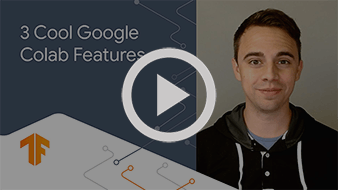
  </a>
</center>

In [ ]:
!pip install langchain-huggingface

In [ ]:
from langchain_huggingface import HuggingFacePipeline

llm = HuggingFacePipeline.from_model_id(
    model_id="microsoft/Phi-3-mini-4k-instruct",
    task="text-generation",
    pipeline_kwargs={
        "max_new_tokens": 100,
        "top_k": 50,
        "temperature": 0.1,
    },
)
llm.invoke("Hugging Face is")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/3.44k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.94M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/599 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/967 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/16.5k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or ‘Colaboratory’, allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a <strong>student</strong>, a <strong>data scientist</strong> or an <strong>AI researcher</strong>, Colab can make your work easier. Watch <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introduction to Colab</a> to find out more, or just get started below!

<div class="markdown-google-sans">

## <strong>Getting started</strong>
</div>

The document that you are reading is not a static web page, but an interactive environment called a <strong>Colab notebook</strong> that lets you write and execute code.

For example, here is a <strong>code cell</strong> with a short Python script that computes a value, stores it in a variable and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut 'Command/Ctrl+Enter'. To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine <strong>executable code</strong> and <strong>rich text</strong> in a single document, along with <strong>images</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To find out more, see <a href="/notebooks/basic_features_overview.ipynb">Overview of Colab</a>. To create a new Colab notebook you can use the File menu above, or use the following link: <a href="http://colab.research.google.com#create=true">Create a new Colab notebook</a>.

Colab notebooks are Jupyter notebooks that are hosted by Colab. To find out more about the Jupyter project, see <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyse and visualise data. The code cell below uses <strong>numpy</strong> to generate some random data, and uses <strong>matplotlib</strong> to visualise it. To edit the code, just click the cell and start editing.

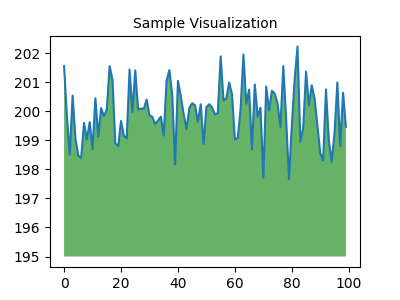

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from GitHub and many other sources. To find out more about importing data, and how Colab can be used for data science, see the links below under <a href="#working-with-data">Working with data</a>.

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">a few lines of code</a>. Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including <a href="#using-accelerated-hardware">GPUs and TPUs</a>, regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the <a href="#machine-learning-examples">machine learning examples</a> below.

<div class="markdown-google-sans">

## More resources

### Working with notebooks in Colab

</div>

- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with data
</div>

- [Loading data: Drive, Sheets and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualising data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine learning crash course

<div>

These are a few of the notebooks from Google's online machine learning course. See the <a href="https://developers.google.com/machine-learning/crash-course/">full course website</a> for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using accelerated hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo voice swap</a>: Use Nvidia NeMo conversational AI toolkit to swap a voice in an audio fragment with a computer-generated one.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Retraining an Image Classifier</a>: Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Text Classification</a>: Classify IMDB film reviews as either <em>positive</em> or <em>negative</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Style Transfer</a>: Use deep learning to transfer style between images.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Multilingual Universal Sentence Encoder Q&amp;A</a>: Use a machine-learning model to answer questions from the SQuAD dataset.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Video Interpolation</a>: Predict what happened in a video between the first and the last frame.
